<a href="https://colab.research.google.com/github/Rakshitha-bhadragiri/Jupyter-notebook-/blob/main/Heart_Disease_Detection_Project-(21NM1A0411).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Detection Using Machine Learning Classifications**

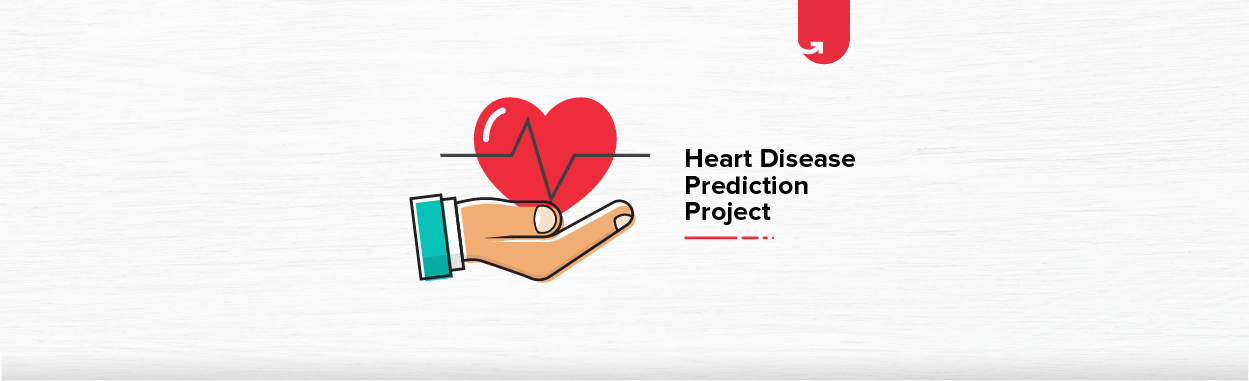

## **1.Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# For Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, auc # Changed import to RocCurveDisplay
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

##**2.Load Dataset**

In [ ]:
# Import the dataset as CSV file
df = pd.read_csv('HDD.csv')

##**3.Data Preparation**

###**3-1.Data Description**

In [ ]:
# Preview the dataset
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

###**3-2.Rename Columns**

In [ ]:
# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

In [ ]:
# Recheck the dataset
df.head()

Age  Sex  Chest_pain_type  Resting_bp  Cholesterol  Fasting_bs  \
0   63    1                3         145          233           1   
1   37    1                2         130          250           0   
2   41    0                1         130          204           0   
3   56    1                1         120          236           0   
4   57    0                0         120          354           0   

   Resting_ecg  Max_heart_rate  Exercise_induced_angina  ST_depression  \
0            0             150                        0            2.3   
1            1             187                        0            3.5   
2            0             172                        0            1.4   
3            1             178                        0            0.8   
4            1             163                        1            0.6   

   ST_slope  Num_major_vessels  Thallium_test  Condition  
0         0                  0              1          1  
1         0                  0              2          1  
2         2                  0              2          1  
3         2                  0              2          1  
4         2                  0              2          1

###**3-3.Check out Missing Values**

In [ ]:
# Check out summary of statistics of numeric columns
df.describe()

Age         Sex  Chest_pain_type  Resting_bp  Cholesterol  \
count  303.000000  303.000000       303.000000  303.000000   303.000000   
mean    54.366337    0.683168         0.966997  131.623762   246.264026   
std      9.082101    0.466011         1.032052   17.538143    51.830751   
min     29.000000    0.000000         0.000000   94.000000   126.000000   
25%     47.500000    0.000000         0.000000  120.000000   211.000000   
50%     55.000000    1.000000         1.000000  130.000000   240.000000   
75%     61.000000    1.000000         2.000000  140.000000   274.500000   
max     77.000000    1.000000         3.000000  200.000000   564.000000   

       Fasting_bs  Resting_ecg  Max_heart_rate  Exercise_induced_angina  \
count  303.000000   303.000000      303.000000               303.000000   
mean     0.148515     0.528053      149.646865                 0.326733   
std      0.356198     0.525860       22.905161                 0.469794   
min      0.000000     0.000000       71.000000                 0.000000   
25%      0.000000     0.000000      133.500000                 0.000000   
50%      0.000000     1.000000      153.000000                 0.000000   
75%      0.000000     1.000000      166.000000                 1.000000   
max      1.000000     2.000000      202.000000                 1.000000   

       ST_depression    ST_slope  Num_major_vessels  Thallium_test   Condition  
count     303.000000  303.000000         303.000000     303.000000  303.000000  
mean        1.039604    1.399340           0.729373       2.313531    0.544554  
std         1.161075    0.616226           1.022606       0.612277    0.498835  
min         0.000000    0.000000           0.000000       0.000000    0.000000  
25%         0.000000    1.000000           0.000000       2.000000    0.000000  
50%         0.800000    1.000000           0.000000       2.000000    1.000000  
75%         1.600000    2.000000           1.000000       3.000000    1.000000  
max         6.200000    2.000000           4.000000       3.000000    1.000000

In [ ]:
# Check out data types, missing values and more
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
# Check missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

##**4.Exploratory Data Analysis (EDA)**

###**4-1.Target Variable - Condition**

In [ ]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df);

###**4-2.Feature Variable - Sex**

In [ ]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


sex_ratio(df);

**Let's calculate the proportion of Malignant tumors for both Female and Male.**

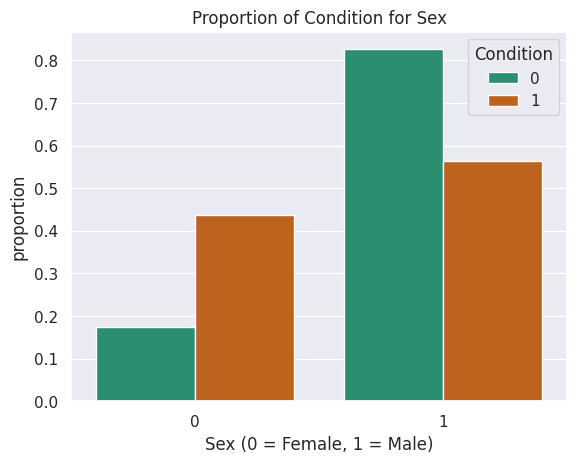

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')


condition_proportion_sex(df);

###**4-3.Risk Factors for Developing Heart Disease**

**Risk Factor**

*   **Fasting_bs : Fasting blood suger (over 120 mg/dl)**

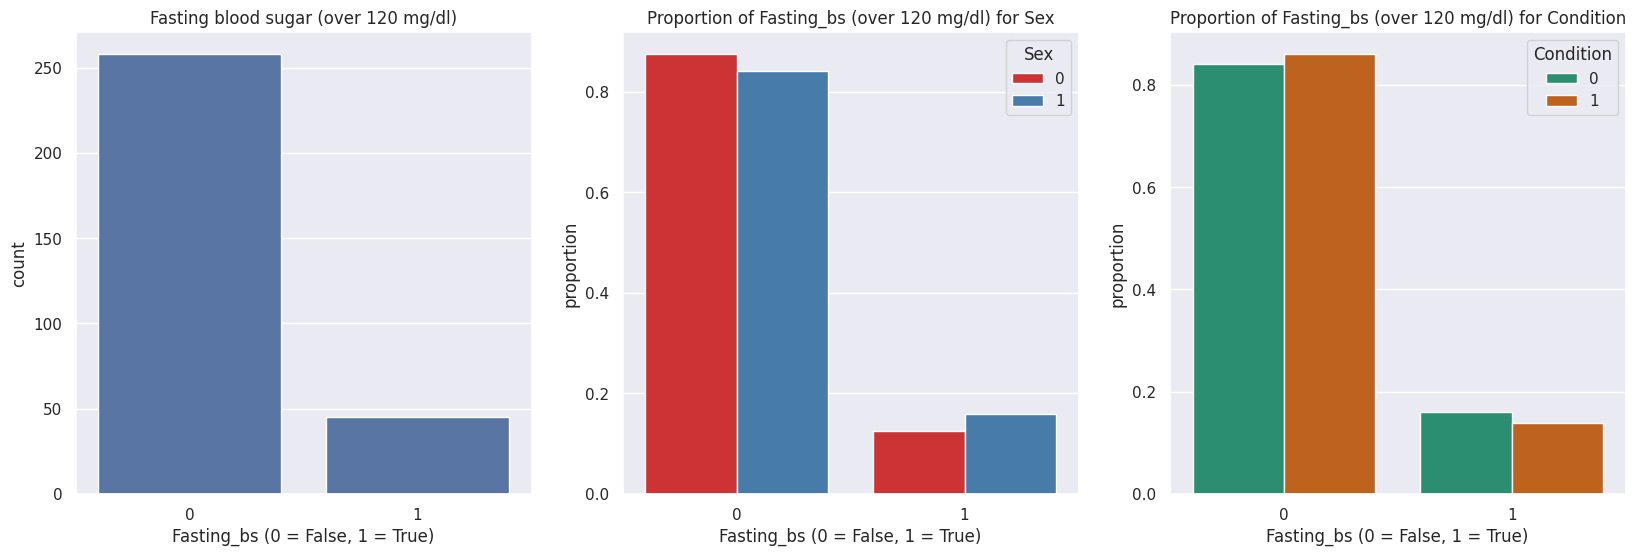

In [ ]:
def risk_factors_fbs(data):
    """
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df);


**Risk Factors**
*   **Resting_bp : Resting blood pressure (mmHg)**
*   **Cholesterol: Serum cholesterol (mg/dL)**
*   **Max_heart_rate: Maximum heart rate achieved (bpm)**






<ipython-input-38-565bbd756889>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-565bbd756889>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-565bbd756889>:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

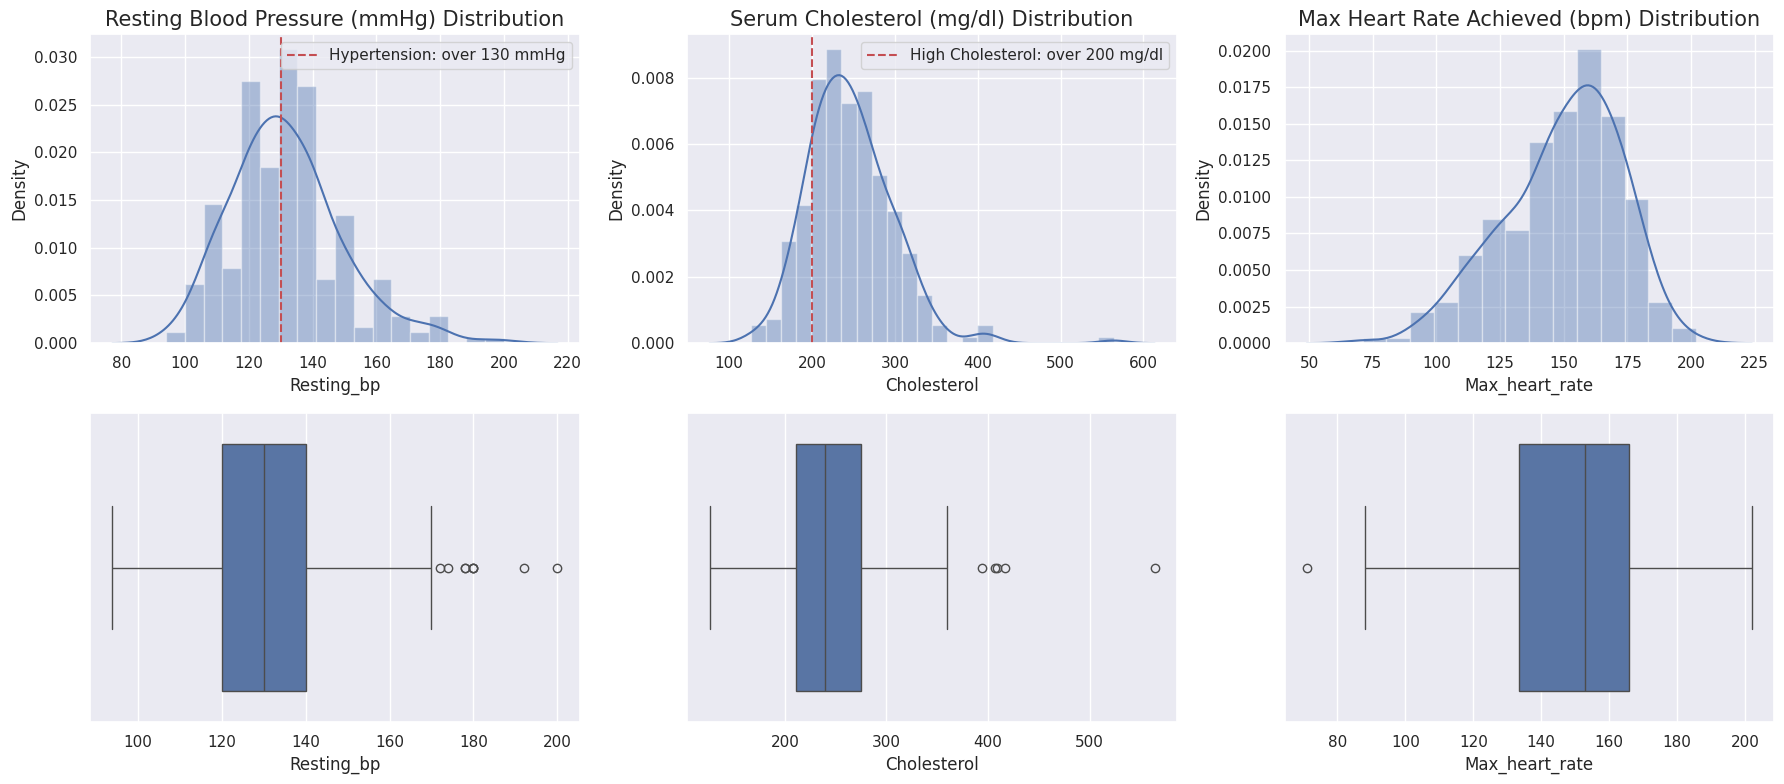

In [ ]:
def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')
    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')
    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist(df);


**Resting_bp, Cholesterol, and Max_heart_rate vs. Sex**

<ipython-input-21-1cee16bbceba>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-1cee16bbceba>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-1cee16bbceba>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` v

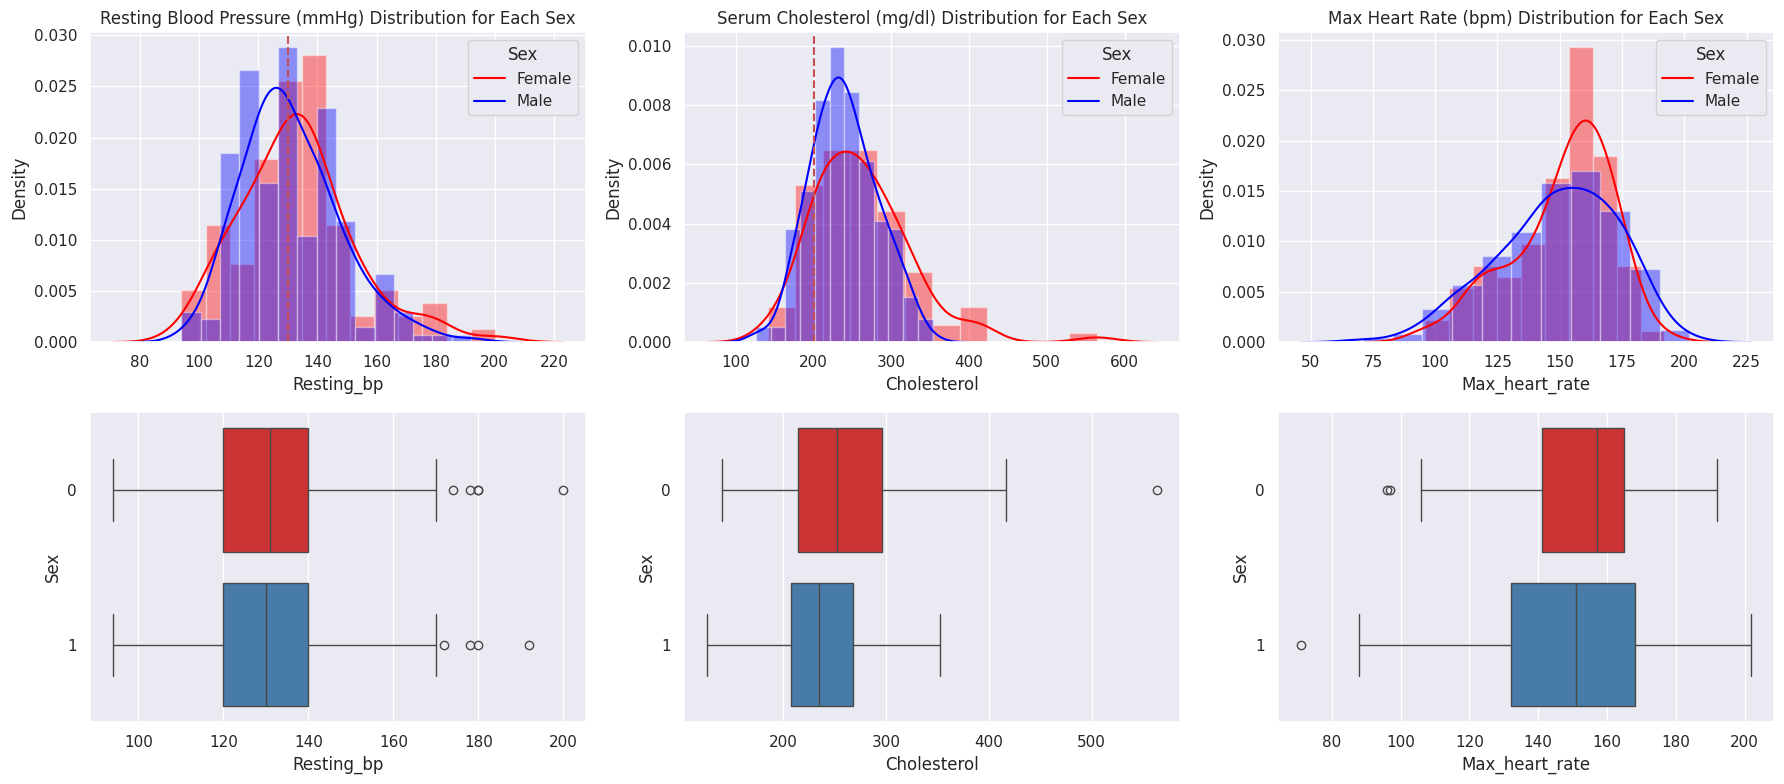

In [ ]:
def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.distplot(trestbps_female, color='Red')
    sns.distplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')


    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')
    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.distplot(thalach_female, color='Red')
    sns.distplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist_sex(df);

**Resting_bp, cholesterol, Max_heart_rate vs. Condition**

<ipython-input-39-905c7830b984>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-39-905c7830b984>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-39-905c7830b984>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` v

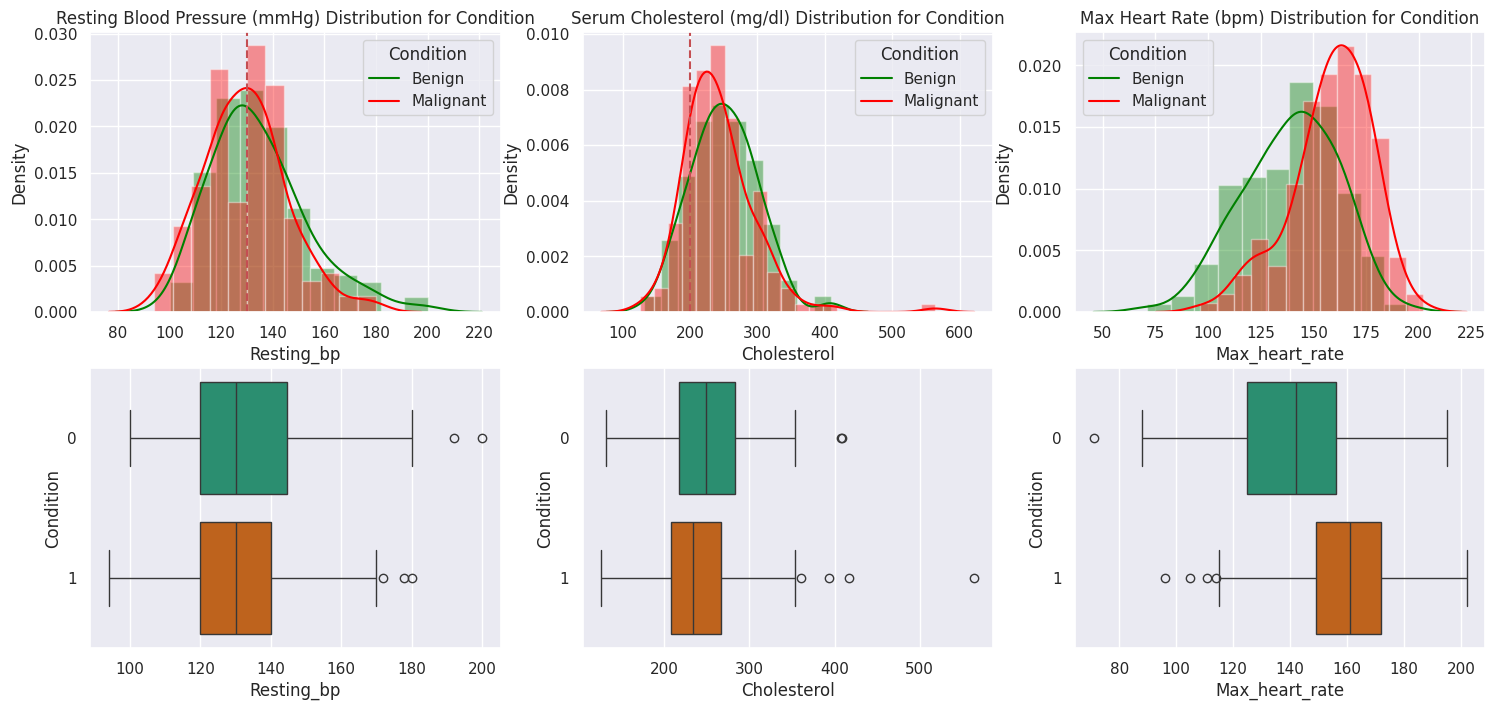

In [ ]:
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'],
                orient='h', palette='Dark2')
    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')
    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')


risk_factors_dist_condition(df);

###**4-4.Symptoms of Heart Disease**

**Symptoms**

*   **Chest_pain_type**
*   **Exercise_induced_angina**



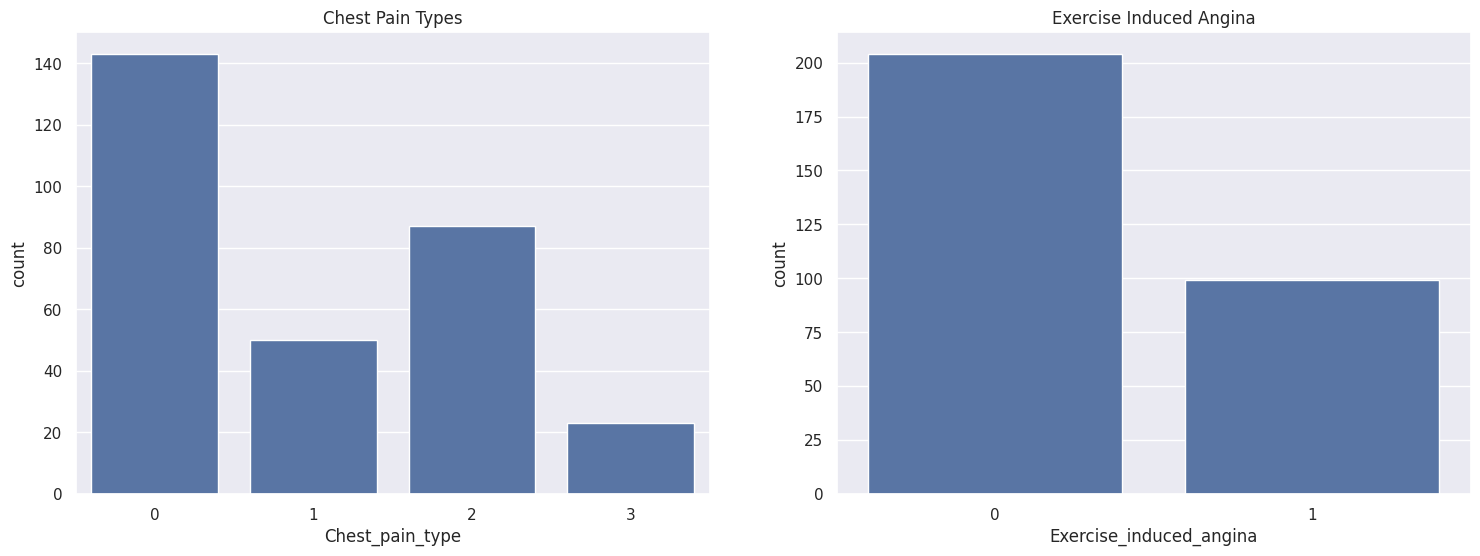

In [ ]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

**Chest_pain_type and Exercise_induced_angine vs. Sex**

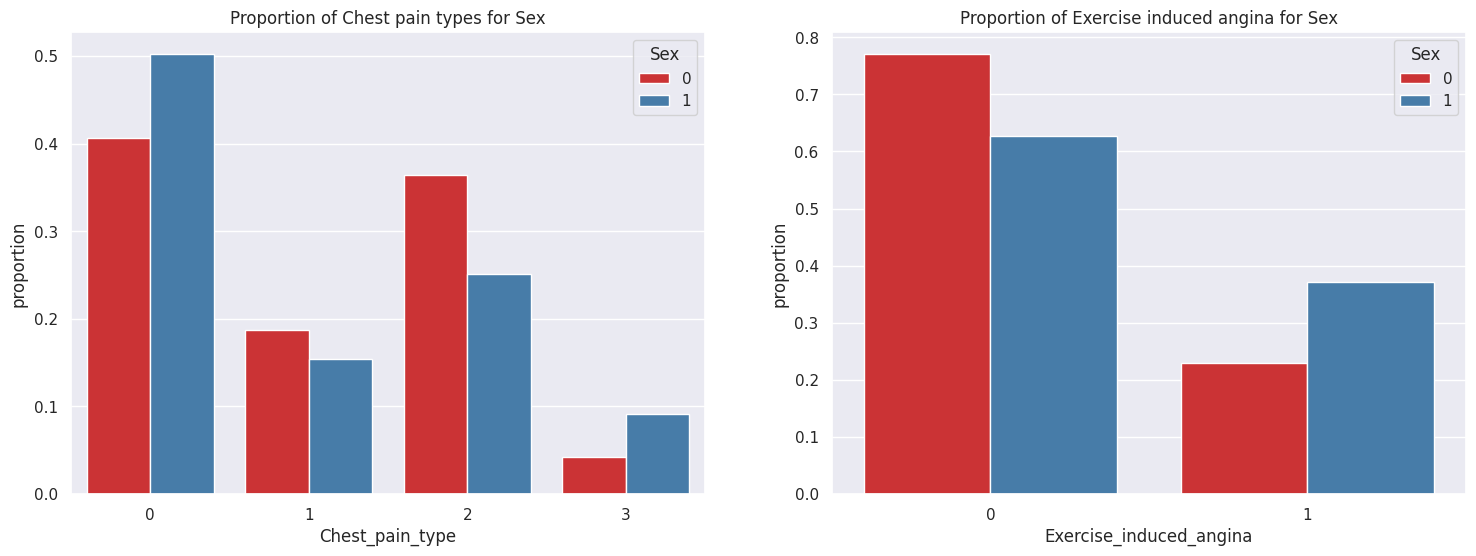

In [ ]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))

    # Chest pain types for Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types for Sex')


    # Exercise induced angina for Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Sex')
    plt.show()


symptoms_features_sex(df);

**Chest_pain_type and Exercise_induced_angine vs. Condition**

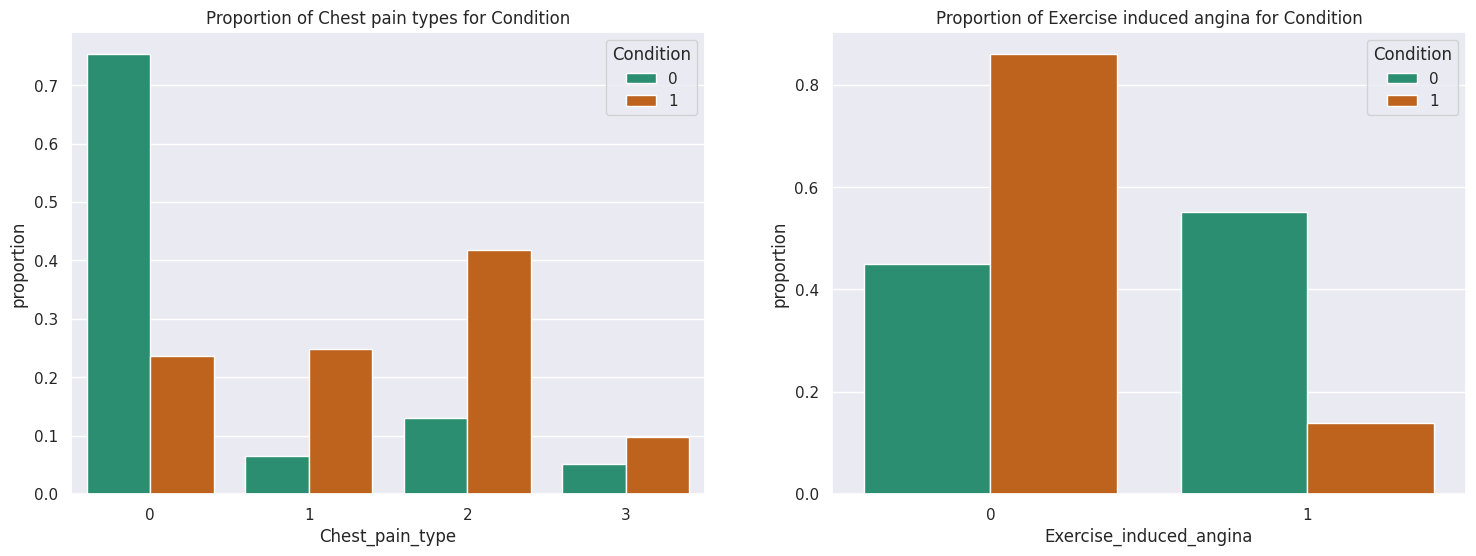

In [ ]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()


symptoms_features_condition(df);

###**4-5.Heart Functions for Heart Disease**

**Heart Functions**

*   **Resting_ecg: Resting electrocardiographic results**
*   **ST_slope: The slope of the peak exercise ST segment**



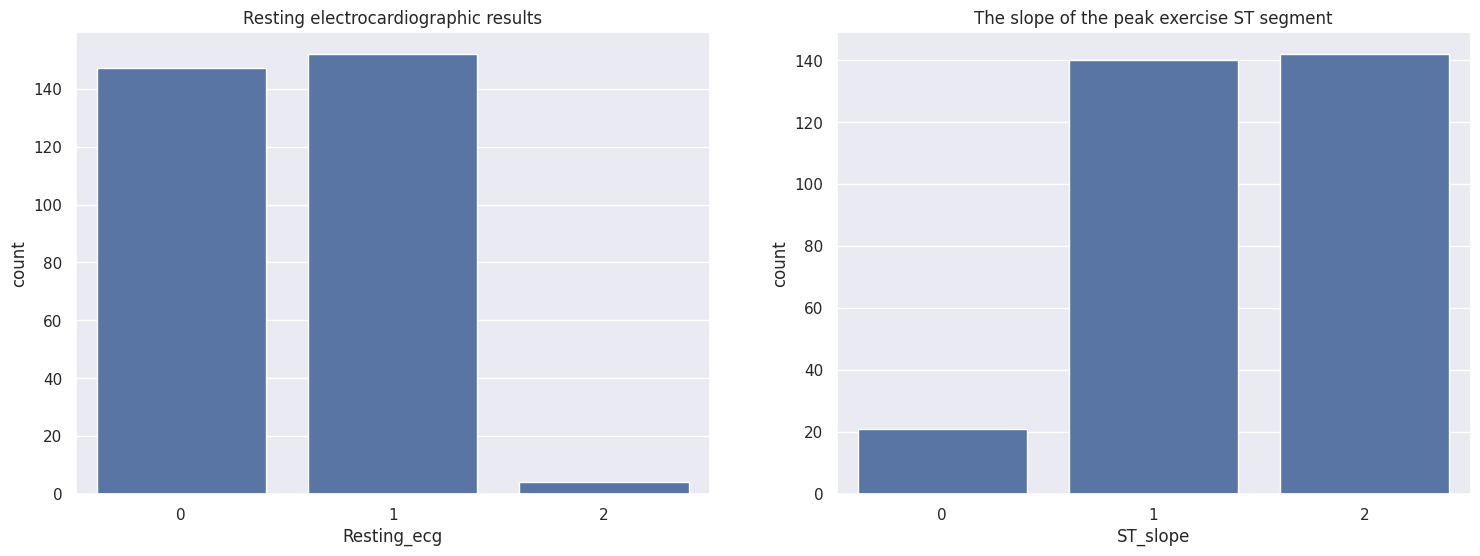

In [ ]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);

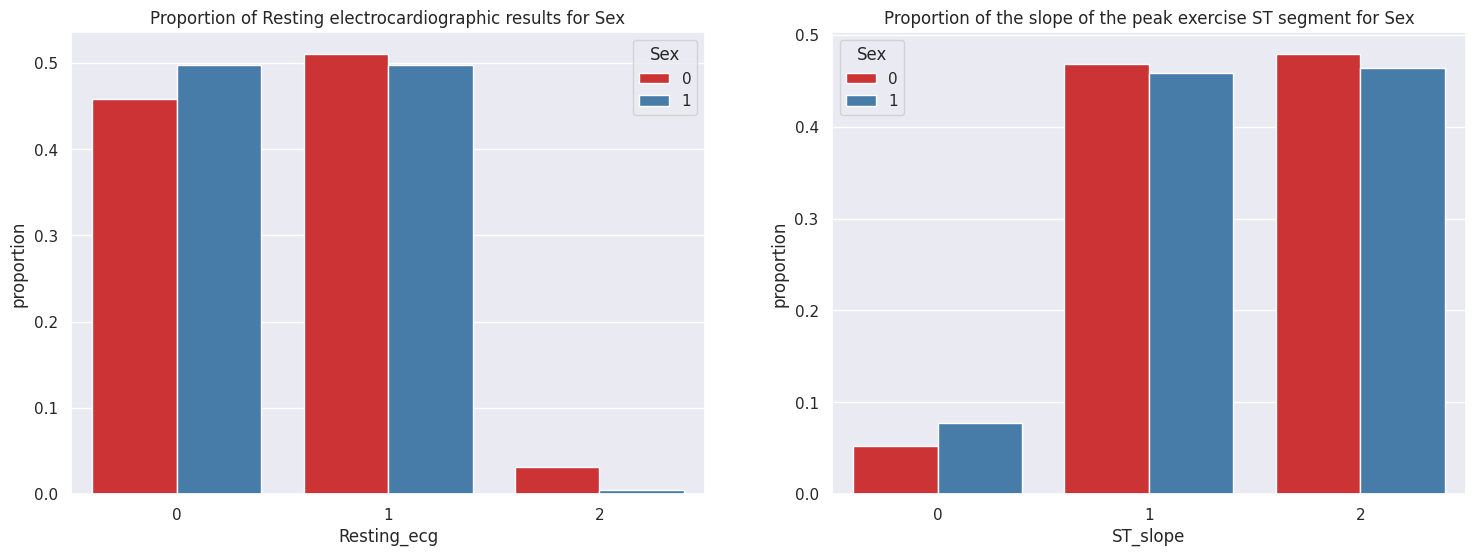

In [ ]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()
heart_functions_sex(df);

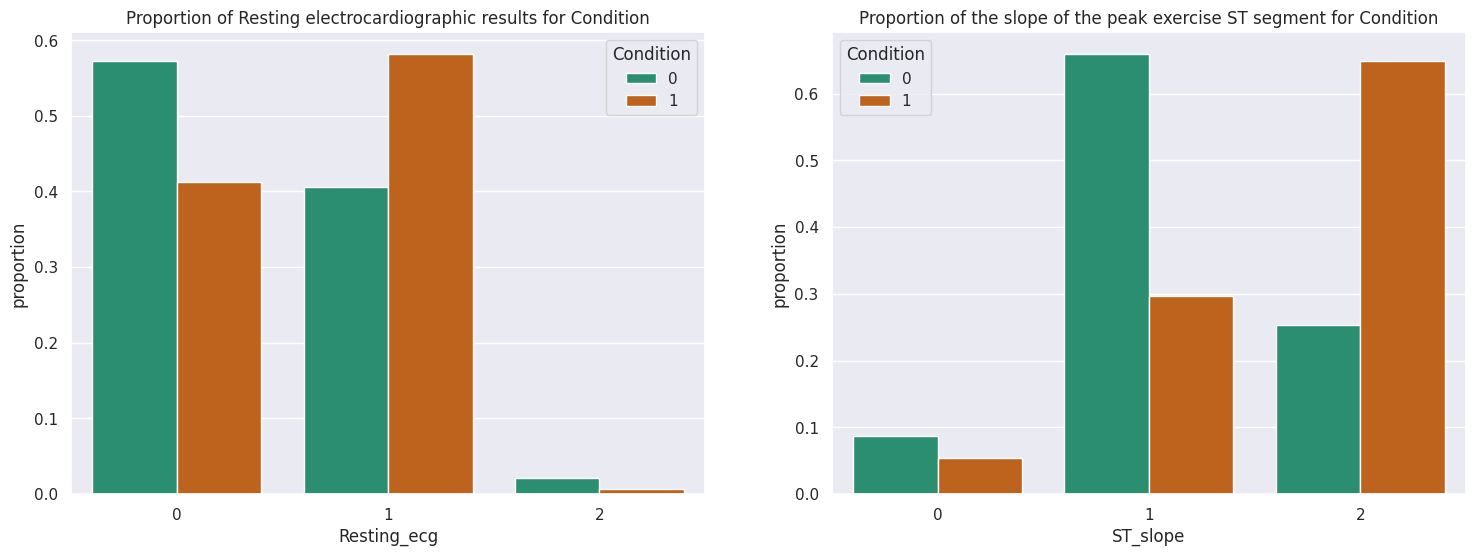

In [ ]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);

**Heart Function**
*   **ST_depression: ST-segment depression induced by exercise relative to rest**



<ipython-input-30-62afa4e6bd08>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-30-62afa4e6bd08>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-30-62afa4e6bd08>:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

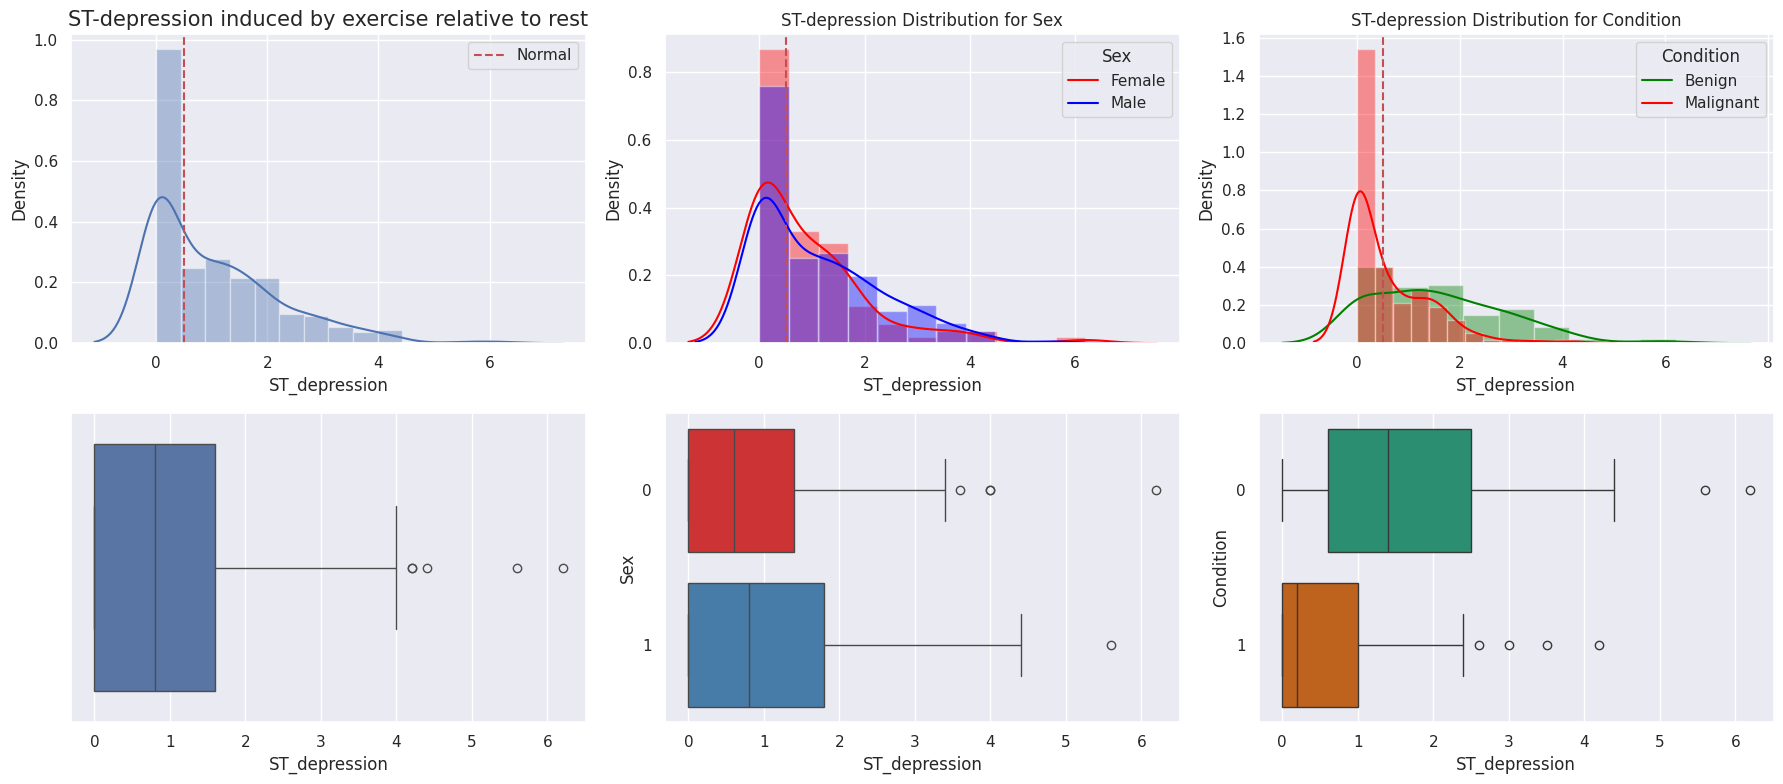

In [ ]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')
    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()


heart_functions_sex(df);

**Heart Functions**

*   **Num_major_vessels: Number of major vessels (0-3) colored by fluoroscopy**
*   **Thallium_test: Thallium scintigraphy**



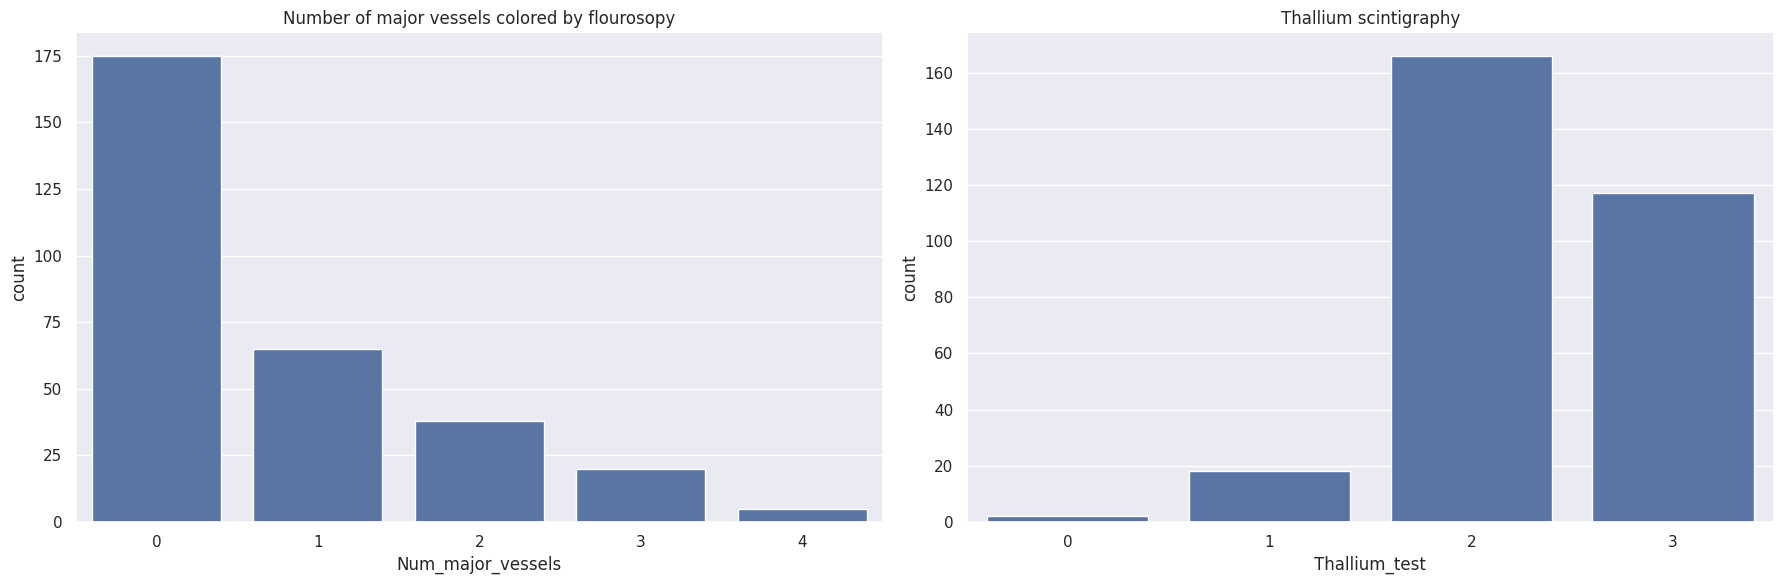

In [ ]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

**Num_major_vessels and Thallium_test vs. Sex**

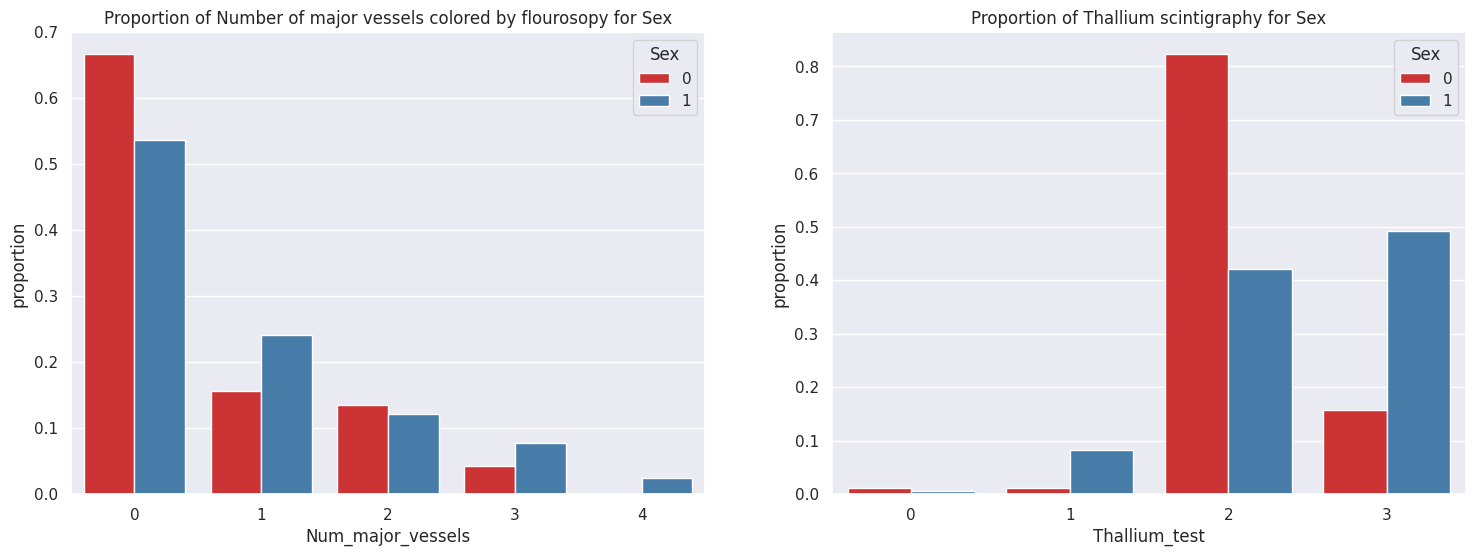

In [ ]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

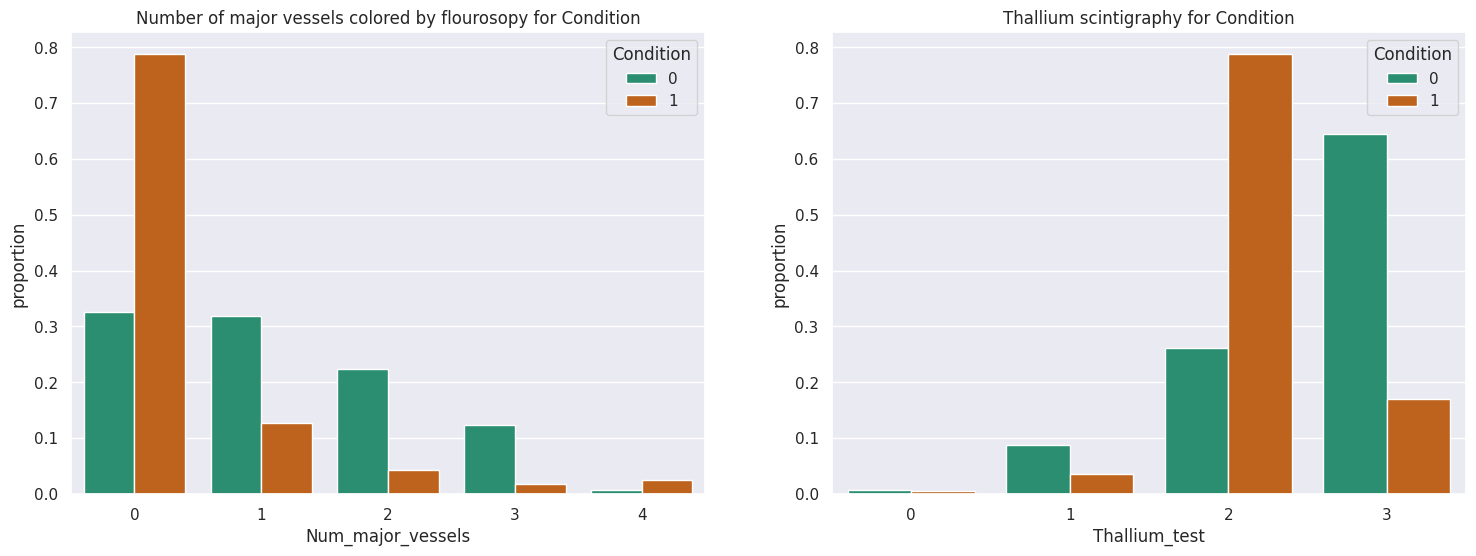

In [ ]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()
heart_functions2_condition(df);

###**4-6.Feature Variable - Age**

<ipython-input-34-311cc2398ce9>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-311cc2398ce9>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-311cc2398ce9>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

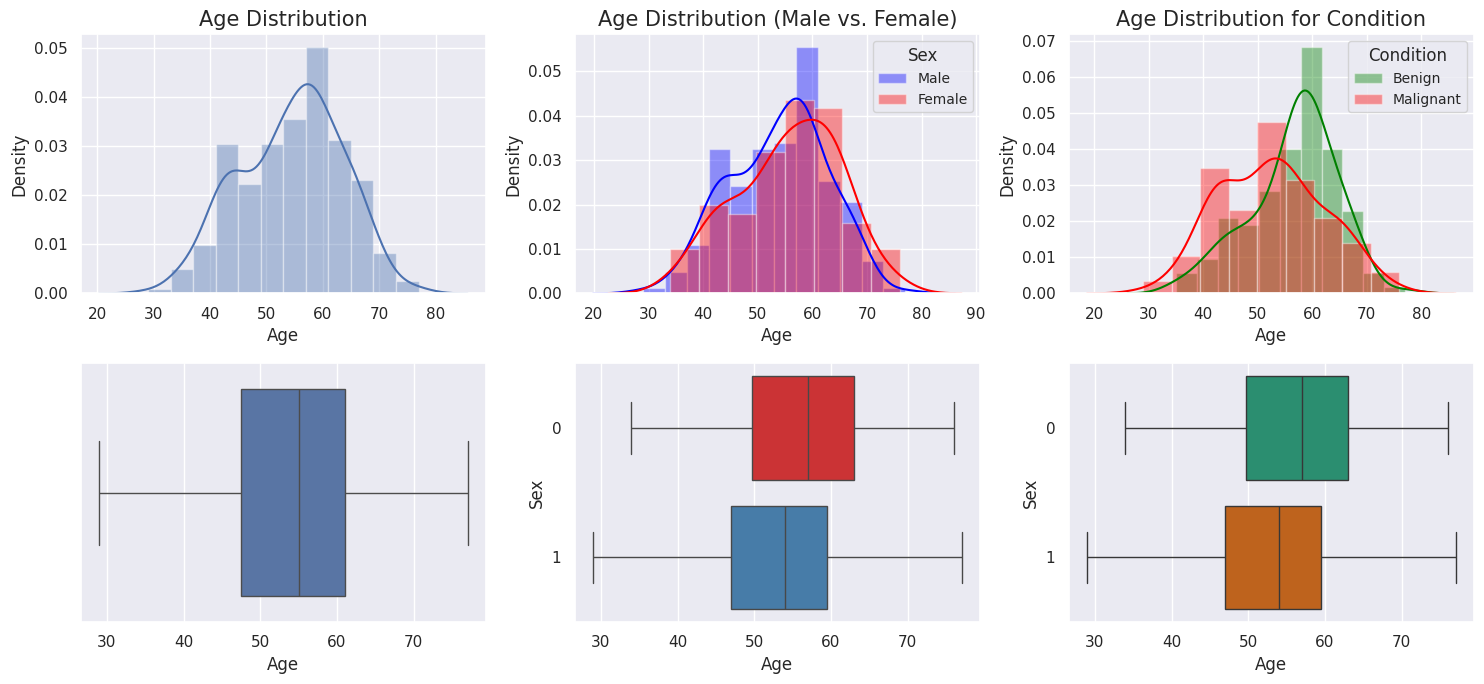

In [ ]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')
    plt.tight_layout()
    plt.show()


age_distribution(df)

###**4-7.Age vs. Multiple Features for Condition**

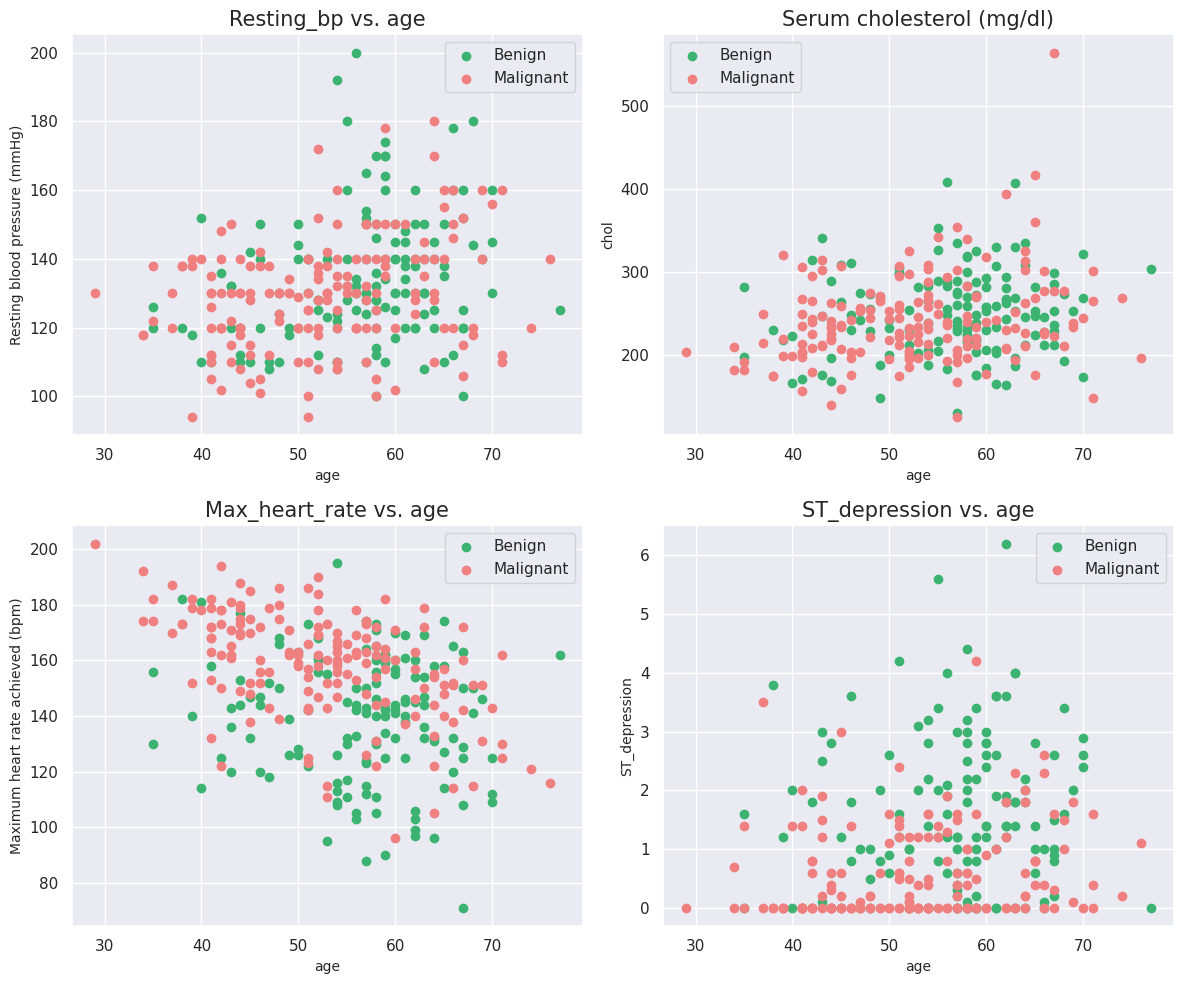

In [ ]:
def numeric_features_vs_age(data):
    """
    Effects of features for heart disease by age
    """
    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)
    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);


###**4-8. Feature vs. Feature for Condition**

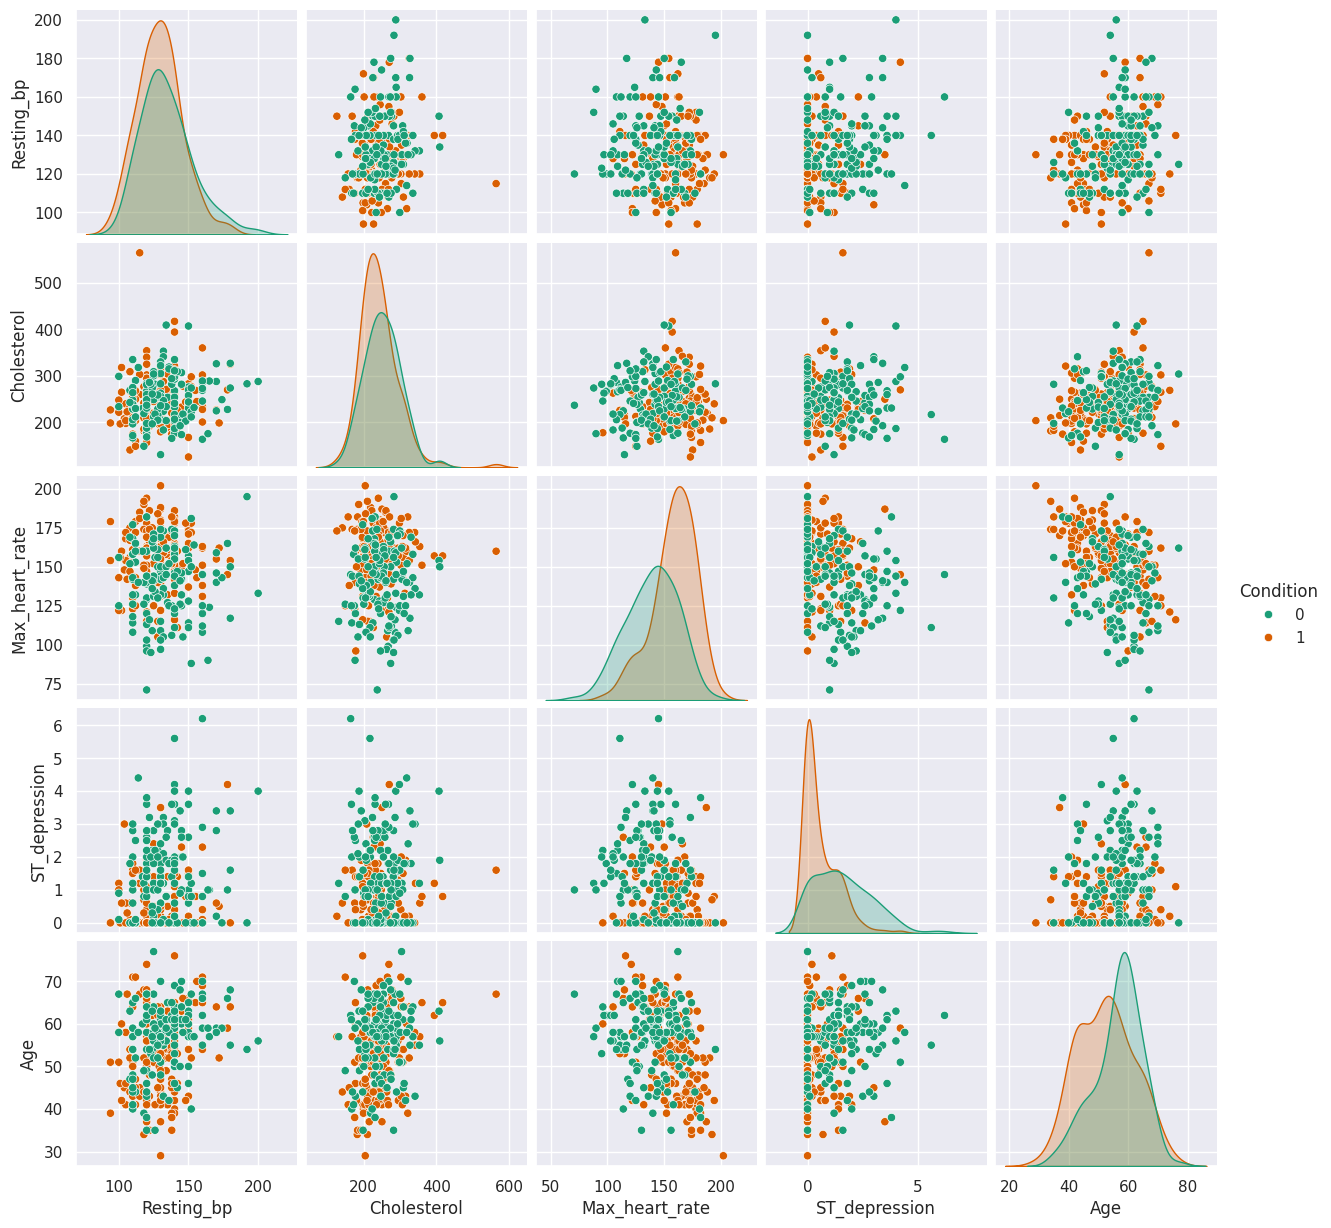

In [ ]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

###**4-9.Correlations**

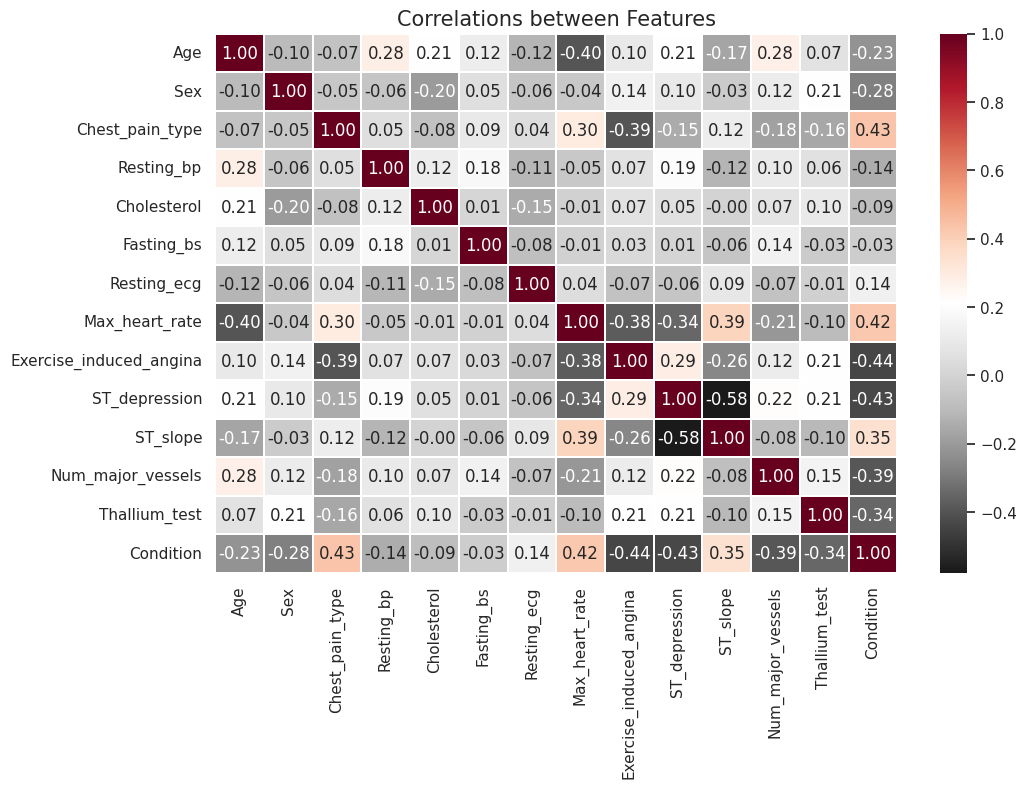

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()


correlation_heatmap(df);

# **Heart Disease Classification - Model Comparison**

## **5. Data Preprocessing**

**Rename Columns**

In [ ]:
# Rename the origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

### **4-1. Train-test Split**

In [ ]:
def get_train_test_split(data):
    """
    Split into train and test set:
    - X = independent variables.
    - y = dependent variable.
    - Setup train_size, 80%, and test_size, 20%, of the dataset.
    """
    X = data.drop(['Condition'], axis=1)
    y = data.Condition
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)
    print(f'Shape of X_train {X_train.shape}')
    print(f'Shape of X_test {X_test.shape}')
    print(f'Shape of y_train {y_train.shape}')
    print(f'Shape of y_test {y_test.shape}')
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_train_test_split(df);

Shape of X_train (242, 13)
Shape of X_test (61, 13)
Shape of y_train (242,)
Shape of y_test (61,)


In [ ]:
# Check the renamed columns
df.head()

Age  Sex  Chest_pain_type  Resting_bp  Cholesterol  Fasting_bs  \
0   63    1                3         145          233           1   
1   37    1                2         130          250           0   
2   41    0                1         130          204           0   
3   56    1                1         120          236           0   
4   57    0                0         120          354           0   

   Resting_ecg  Max_heart_rate  Exercise_induced_angina  ST_depression  \
0            0             150                        0            2.3   
1            1             187                        0            3.5   
2            0             172                        0            1.4   
3            1             178                        0            0.8   
4            1             163                        1            0.6   

   ST_slope  Num_major_vessels  Thallium_test  Condition  
0         0                  0              1          1  
1         0                  0              2          1  
2         2                  0              2          1  
3         2                  0              2          1  
4         2                  0              2          1

### **4-2. Normalization**

In [ ]:
# Normalize the dataset
def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train);
X_test = get_normalization(X_test);

## **5. Build Models**

### **5- 1. Logistic Regression**

In [ ]:
# Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [ ]:
def get_model_accuracy(model, X_test, y_test):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    model_acc = model.score(X_test, y_test)
    return model_acc

In [ ]:
# Accuracy in Logistic Regression model
logreg_acc = get_model_accuracy(logreg, X_test, y_test)
print(f'Logistic Regression Accuracy: {logreg_acc:.4}')
print()

# Predict class for X_test
y_pred_logreg = logreg.predict(X_test)

# Classification Report of logistic regression model
print(classification_report(y_pred_logreg, y_test))

Logistic Regression Accuracy: 0.8525

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Logistic Regression with GridSearchCV**

In [ ]:
def get_best_parameters_GridSearchCV(model, params, X_train, y_train):
    clf = GridSearchCV(model, params, cv=5)
    clf.fit(X_train, y_train)

    best_params = clf.best_params_
    print(f'Best Parameters in {model}: {best_params}')
    print()

    best_estimator = clf.best_estimator_
    return best_estimator


In [ ]:
params_logreg = {'penalty': ['l1', 'l2', 'elasticnet'],
                 'C': np.logspace(-4, 4, 20),
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# Build and fit parameter tuned Logistic Regression model
logreg_gscv = get_best_parameters_GridSearchCV(logreg, params_logreg, X_train, y_train)
logreg_gscv = logreg_gscv.fit(X_train, y_train)

# Accuracy test score for logreg_cv
logreg_gscv_acc = get_model_accuracy(logreg_gscv, X_test, y_test)
print(f'Logistic Regression Model with GridSearchCV Accuracy: {logreg_gscv_acc:.4}')
print()

# Make prediction on test dataset
y_pred_logreg_gscv = logreg_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_logreg_gscv, y_test))

Best Parameters in LogisticRegression(): {'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'saga'}

Logistic Regression Model with GridSearchCV Accuracy: 0.8689

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### **5-2. Random Forest**

In [ ]:
# Build and fit Random Forest model
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

# Accuracy score for Random Forest
rf_acc = get_model_accuracy(rf_model, X_test, y_test)
print(f'RandomForestClassifier Accuracy: {rf_acc:.4}')
print()

# Predict class for X_test
y_pred_rf = rf_model.predict(X_test)

# Classification Report of Random Forest model
print(classification_report(y_pred_rf, y_test))

RandomForestClassifier Accuracy: 0.8689

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



**Random Forest Model with GridSearchCV**

In [ ]:
params_rf = {'max_depth': [2, 3, 4, 5],
               'max_features': ['auto', 'sqrt', 'log2'],
               'n_estimators':[0, 10, 50],
               'random_state': [0, 10, 42]}

In [ ]:
# Build and fit Random Forest model with the best hyperparameters
rf_gscv = get_best_parameters_GridSearchCV(rf_model, params_rf, X_train, y_train)
rf_gscv = rf_gscv.fit(X_train, y_train)

# Accuracy score for rf_gscv
rf_gscv_acc = get_model_accuracy(rf_gscv, X_test, y_test)
print(f'Random Forest with GridSearchCV Accuracy: {rf_gscv_acc:.4}')
print()

# Make prediction on test dataset
y_pred_rf_gscv = rf_gscv.predict(X_test)

# Classification Report of grid_rf_model
print(classification_report(y_pred_rf_gscv, y_test))

Best Parameters in RandomForestClassifier(): {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 0}

Random Forest with GridSearchCV Accuracy: 0.8689

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### **5-3. Support Vector Machine (SVM)**

In [ ]:
# Build and fit Support Vestor Classification model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

# Accuracy score for svm_model
svm_acc = get_model_accuracy(svm_model, X_test, y_test)
print(f'SVM Accuracy: {svm_acc:.4}')
print()

# Predict class for X_test
y_pred_svm = svm_model.predict(X_test)

# Classification Report of svm_model
print(classification_report(y_pred_svm, y_test))

SVM Accuracy: 0.8525

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**SVM Model with GridSearchCV**

In [ ]:
params_svm = {'C': [0.1,1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
              'kernel': ['linear', 'poly', 'sigmoid']}

In [ ]:
# Build and fit SVM model with the best parameters
svm_gscv = get_best_parameters_GridSearchCV(svm_model, params_svm, X_train, y_train)
svm_gscv = svm_gscv.fit(X_train, y_train)

# Accuracy test score for svm_gscv
svm_gscv_acc = get_model_accuracy(svm_gscv, X_test, y_test)
print(f'SVM with GridSerchCV Accuracy: {svm_gscv_acc:.4}')
print()

# Predict class for X_test
y_pred_svm_gscv = svm_gscv.predict(X_test)

# Classification Report of svm_gscv
print(classification_report(y_pred_svm_gscv, y_test))

Best Parameters in SVC(): {'C': 10, 'gamma': 1, 'kernel': 'linear'}

SVM with GridSerchCV Accuracy: 0.8852

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **5-4. XGBoost Classifier**

In [ ]:
# Build and fit XGBoost model
xgb_model = XGBClassifier(eval_metric='error')
xgb_model = xgb_model.fit(X_train, y_train)

# Accuracy score for xgb_model
xgb_acc = get_model_accuracy(xgb_model, X_test, y_test)
print(f'XGBoost Classifier Accuracy: {xgb_acc:.4}')
print()

# Predict class for X_test
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report of xgb_model
print(classification_report(y_pred_xgb, y_test))

XGBoost Classifier Accuracy: 0.8361

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.75      0.92      0.83        26

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.84      0.84        61



**XGBoost Classifier with GridSearchCV**

In [ ]:
params_xgb = {'learning_rate': [4, 5, 6],
              'max_depth': [4, 5, 6],
              'min_child_weight': [4, 5, 6],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'eval_metric': ['error']}

In [ ]:
# Build and fit XGBoost Classifier model with the best parameters
xgb_gscv = get_best_parameters_GridSearchCV(xgb_model, params_xgb, X_train, y_train)
xgb_gscv = xgb_gscv.fit(X_train, y_train)

# Accuracy score for xgb_gscv
xgb_gscv_acc = get_model_accuracy(xgb_gscv, X_test, y_test)
print(f'XGBoost Classifier with GridSerchCV Accuracy: {xgb_gscv_acc:.4}')
print()

# Predict class for X_test
y_pred_xgb_gscv = xgb_gscv.predict(X_test)

# Classification Report of xgb_cv
print(classification_report(y_pred_xgb_gscv, y_test))

Best Parameters in XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): {'colsample_bytree': 1, 'eval_metric': 'error', 'learning_rate': 5, 'max_depth': 4, 'min_child_weight': 6}

XGBoost Classifier with GridSerchCV Accuracy: 0.8033

              precision    recall  f1-score   support

  

## **6. Model Evaluation**

### **6-1. Confusion Matrix**

In [ ]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

**# Logistic Regression model**

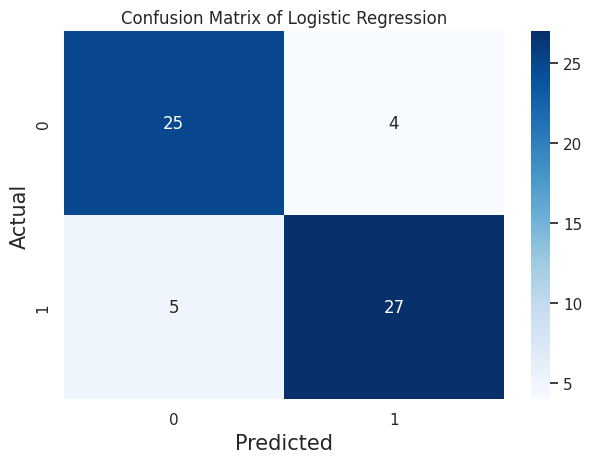

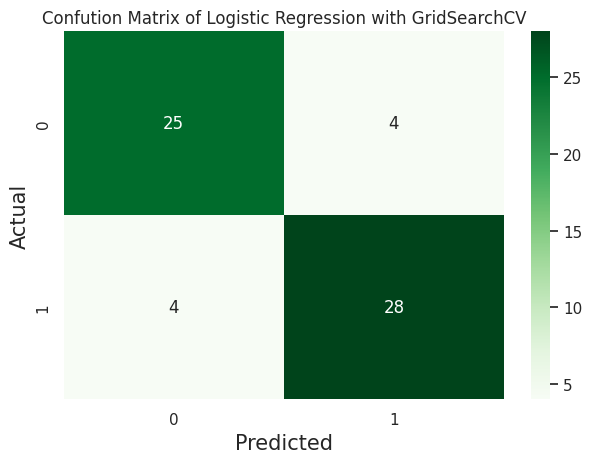

In [ ]:
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(y_test, y_pred_logreg, 'Blues', title);

# Logistic Regression with GridSearchCV
title = 'Confution Matrix of Logistic Regression with GridSearchCV'
plot_confusion_matrix(y_test, y_pred_logreg_gscv, 'Greens', title)

**# Random Forest model**

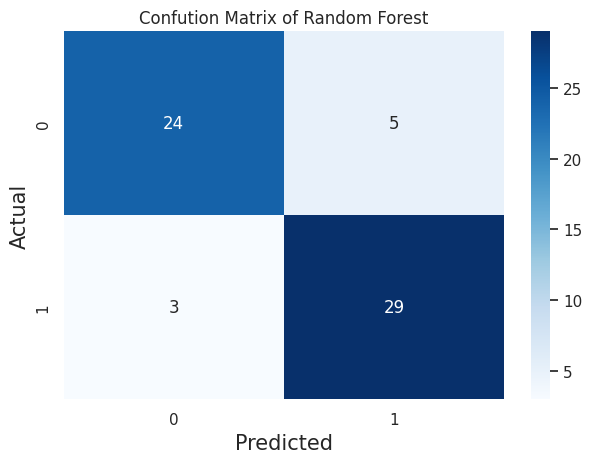

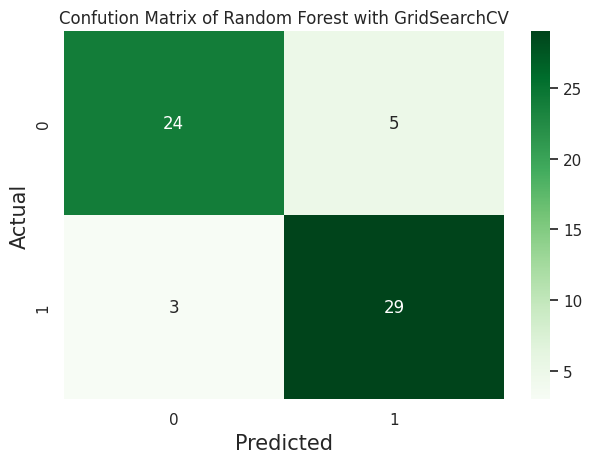

In [ ]:
title = 'Confution Matrix of Random Forest'
plot_confusion_matrix(y_test, y_pred_rf, 'Blues', title);

# Random Forest with hyperparameter tuning
title = 'Confution Matrix of Random Forest with GridSearchCV'
plot_confusion_matrix(y_test, y_pred_rf_gscv, 'Greens', title)

**# SVM model**

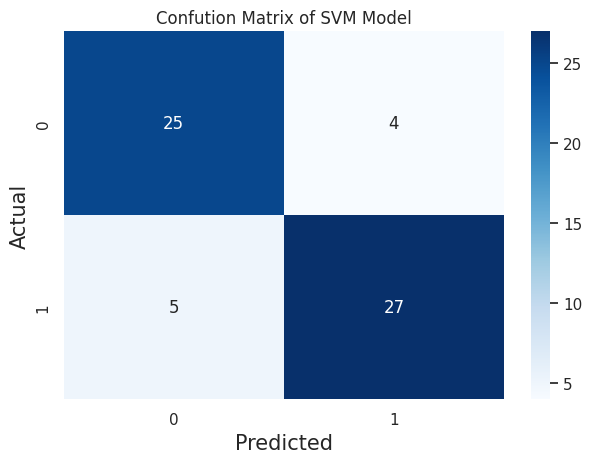

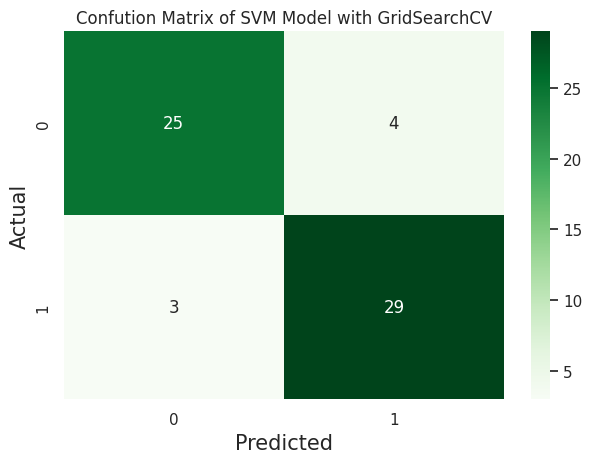

In [ ]:
title = 'Confution Matrix of SVM Model'
plot_confusion_matrix(y_test, y_pred_svm, 'Blues', title);

# SVM with parameter tuning
title = 'Confution Matrix of SVM Model with GridSearchCV'
plot_confusion_matrix(y_test, y_pred_svm_gscv, 'Greens', title)

**# XGBoost Classifier model**

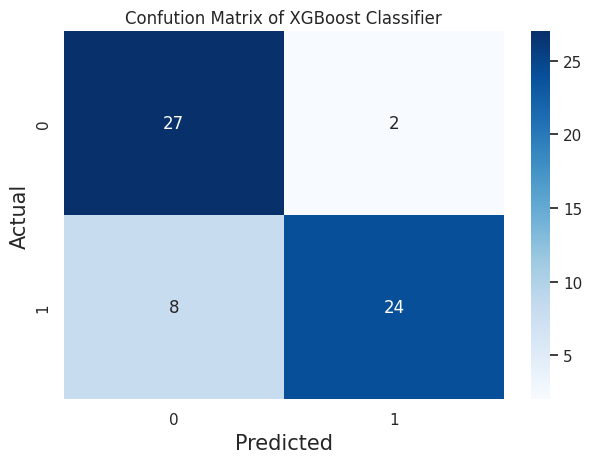

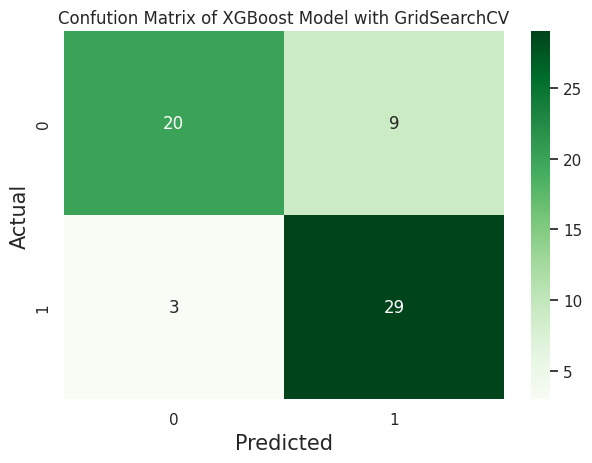

In [ ]:
title = 'Confution Matrix of XGBoost Classifier'
plot_confusion_matrix(y_test, y_pred_xgb, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confution Matrix of XGBoost Model with GridSearchCV'
plot_confusion_matrix(y_test, y_pred_xgb_gscv, 'Greens', title)

### **6-2. ROC and AUC**

In [ ]:
def plot_roc_auc(model1, model2, X_test, y_test, title1, title2):
    """
    Show both ROC and AUC of the model and its parameter tuning model
    """
    plot_roc_curve(model1, X_test, y_test)
    plt.title(title1, fontsize=13)

    plot_roc_curve(model2, X_test, y_test)
    plt.title(title2, fontsize=13)
    plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay # import RocCurveDisplay instead of plot_roc_curve

def plot_roc_auc(model1, model2, X_test, y_test, title1, title2):
    """
    Show both ROC and AUC of the model and its parameter tuning model
    """

    # Use RocCurveDisplay.from_estimator instead of plot_roc_curve
    RocCurveDisplay.from_estimator(model1, X_test, y_test)
    plt.title(title1, fontsize=13)

    RocCurveDisplay.from_estimator(model2, X_test, y_test)
    plt.title(title2, fontsize=13)
    plt.show()

**# ROC and AUC for Logistic Regression models**

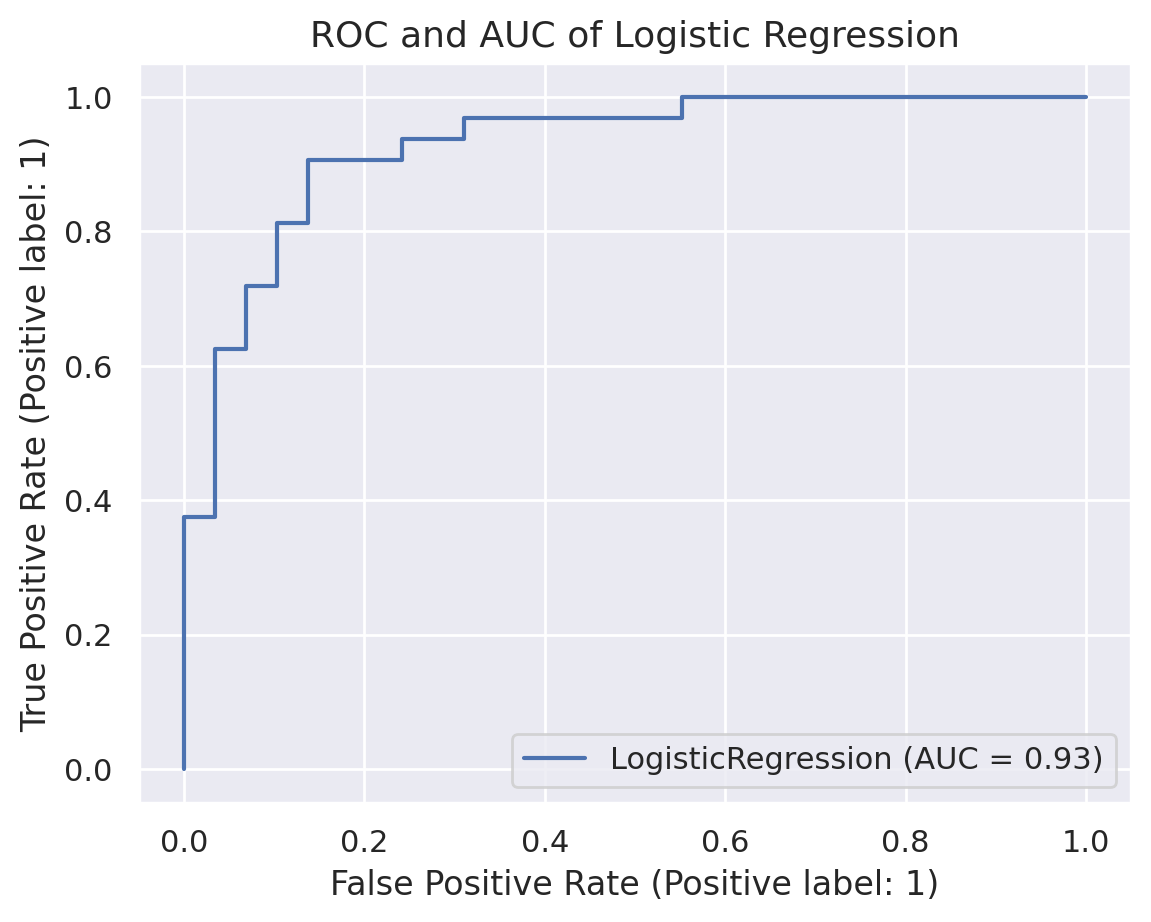

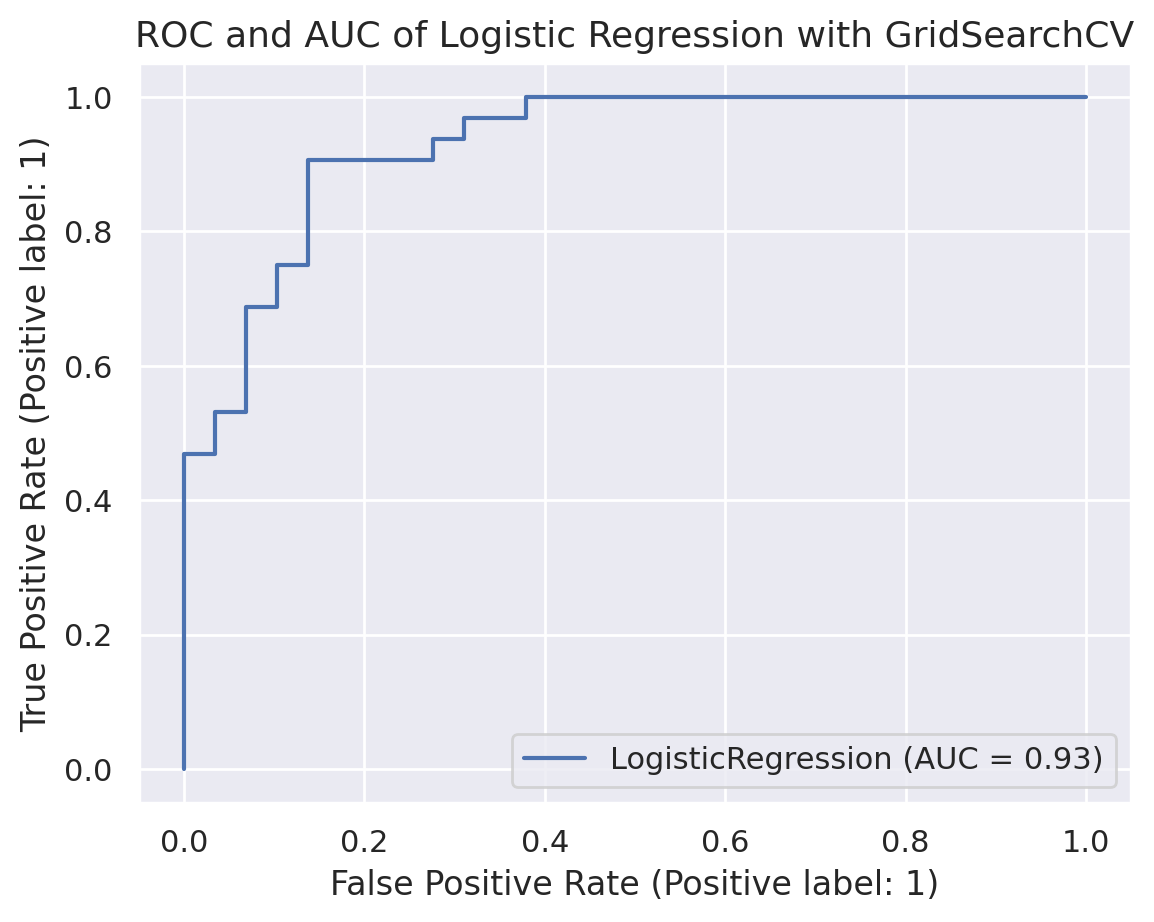

In [ ]:
title1 = 'ROC and AUC of Logistic Regression'
title2 = 'ROC and AUC of Logistic Regression with GridSearchCV'
plot_roc_auc(logreg, logreg_gscv, X_test, y_test, title1, title2);

**# ROC and AUC for Random Forest models**

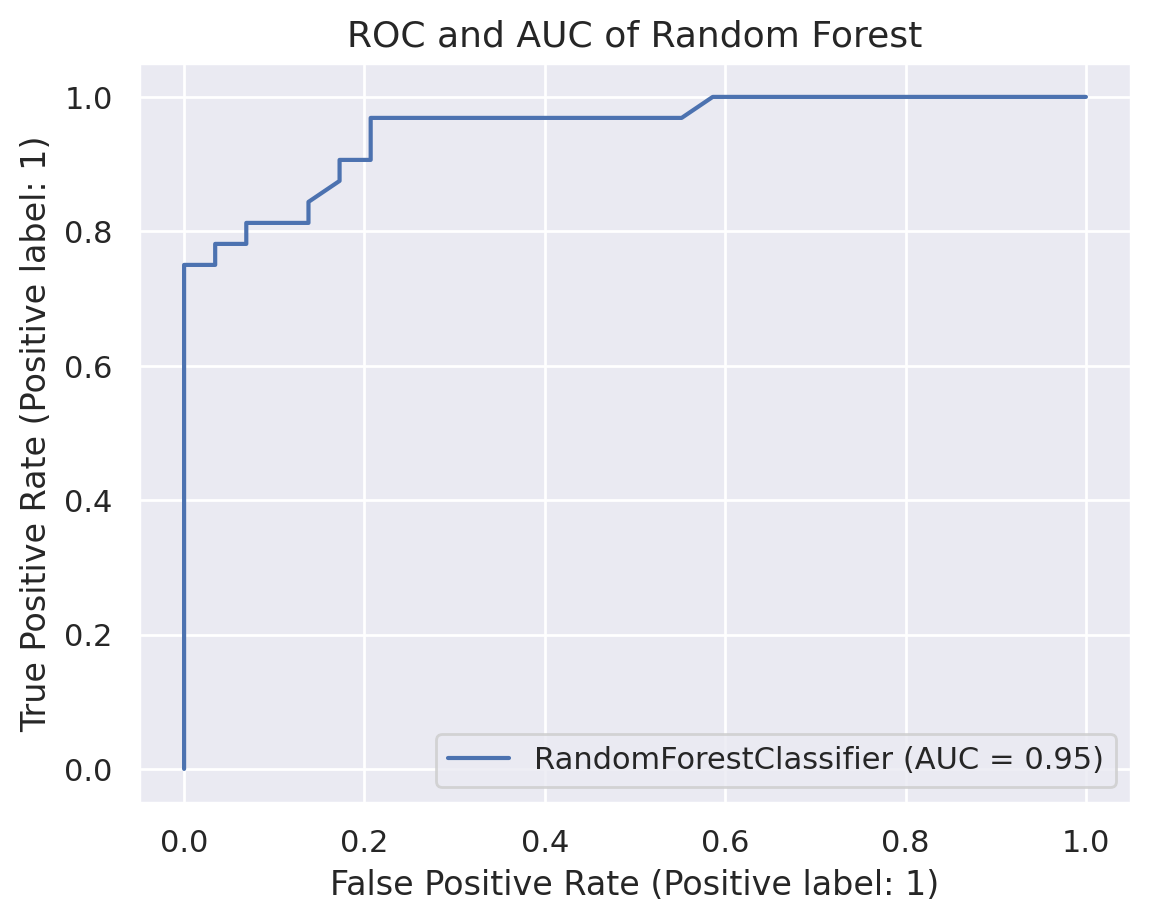

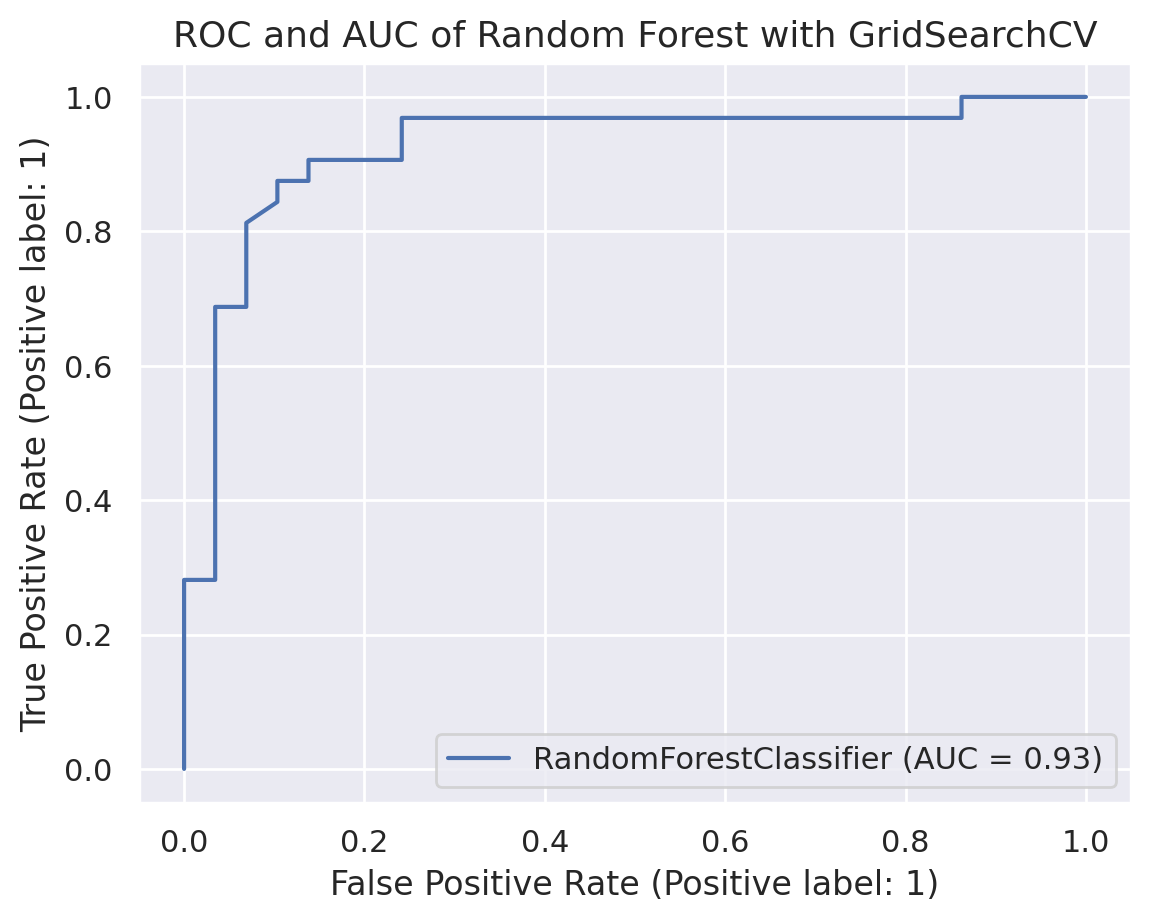

In [ ]:
title1 = 'ROC and AUC of Random Forest'
title2 = 'ROC and AUC of Random Forest with GridSearchCV'
plot_roc_auc(rf_model, rf_gscv, X_test, y_test, title1, title2);

**# ROC and AUC for SVM models**

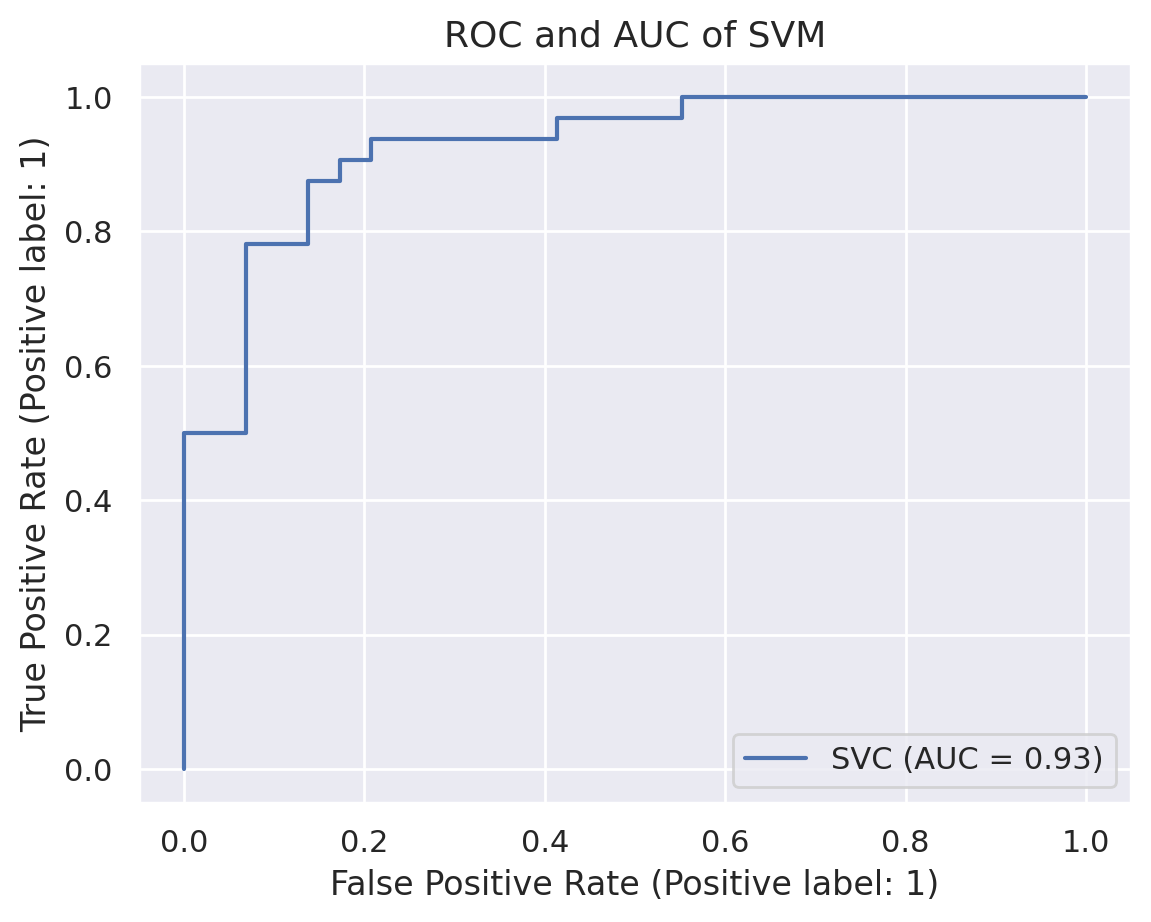

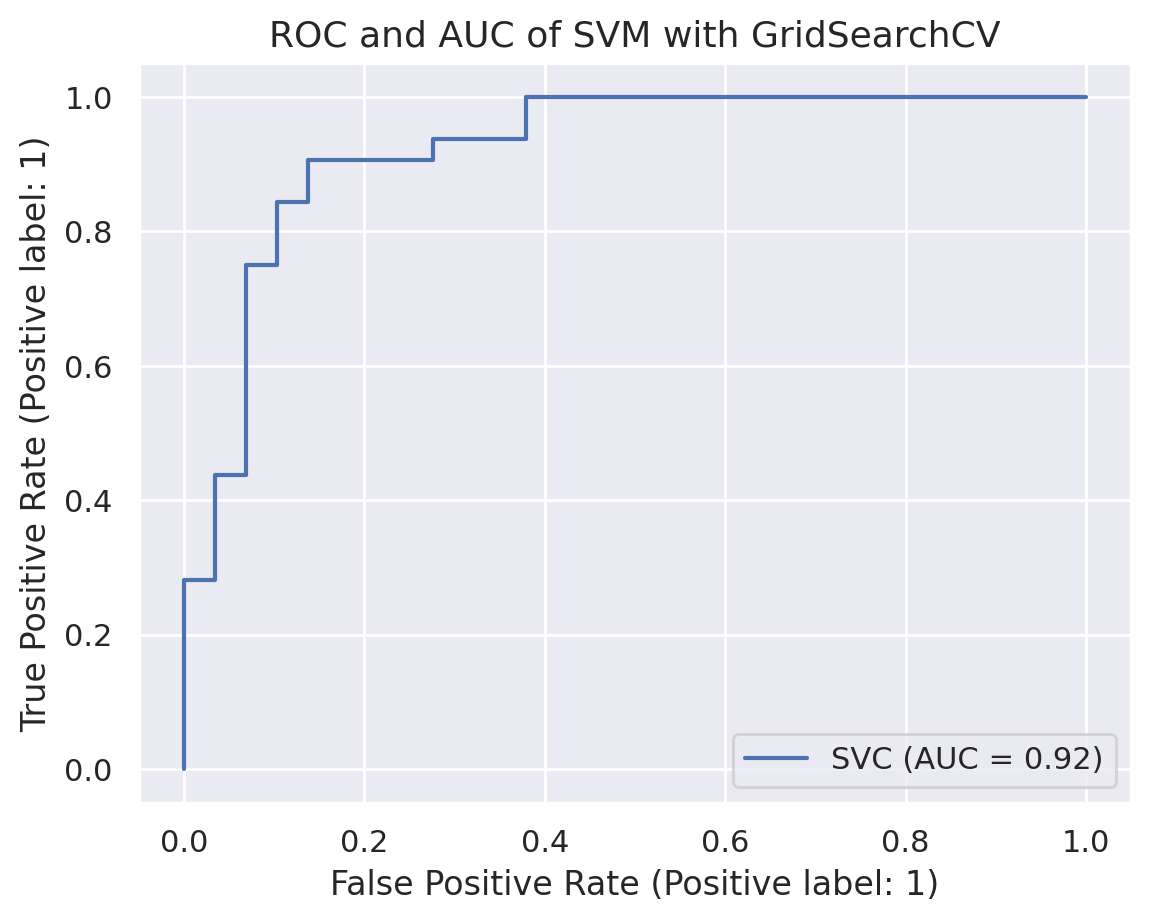

In [ ]:
title1 = 'ROC and AUC of SVM'
title2 = 'ROC and AUC of SVM with GridSearchCV'
plot_roc_auc(svm_model, svm_gscv, X_test, y_test, title1, title2);

**# ROC and AUC for XGBClassifier**

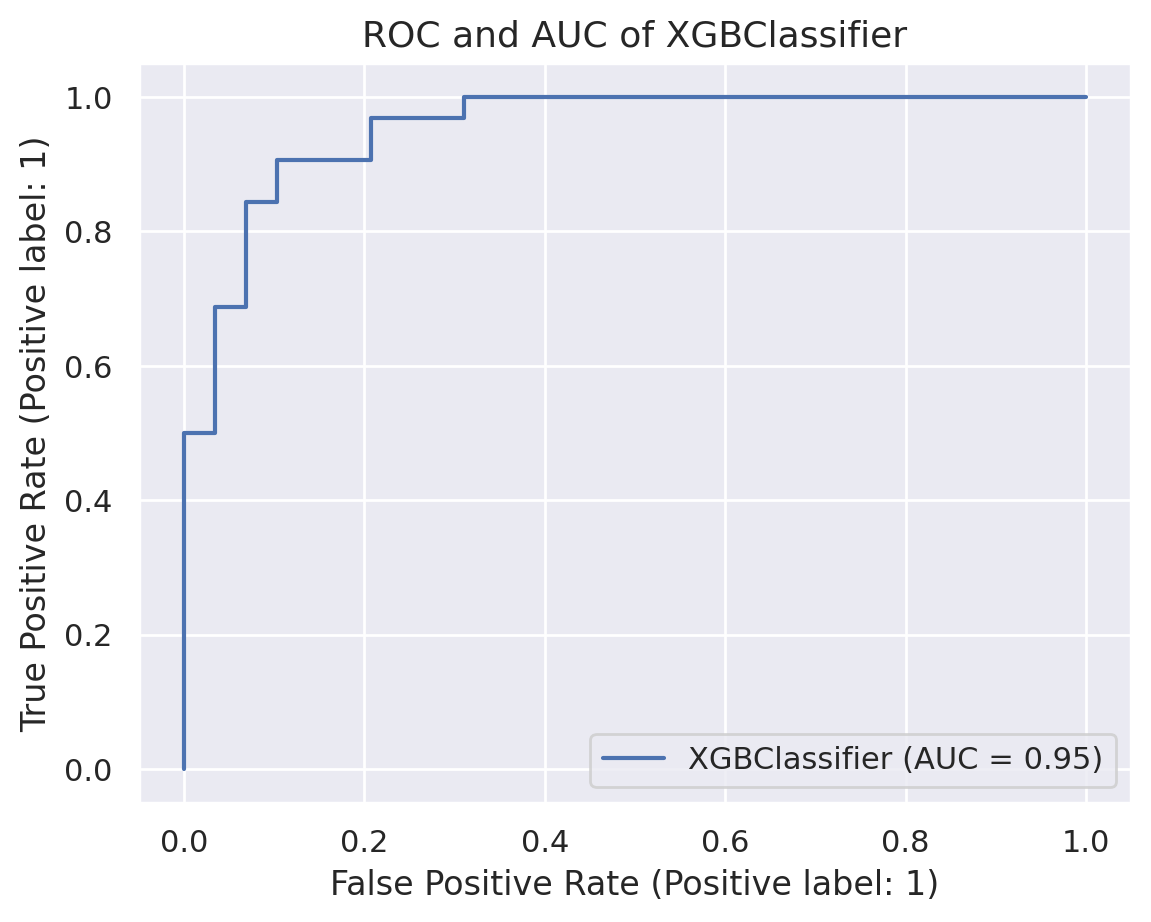

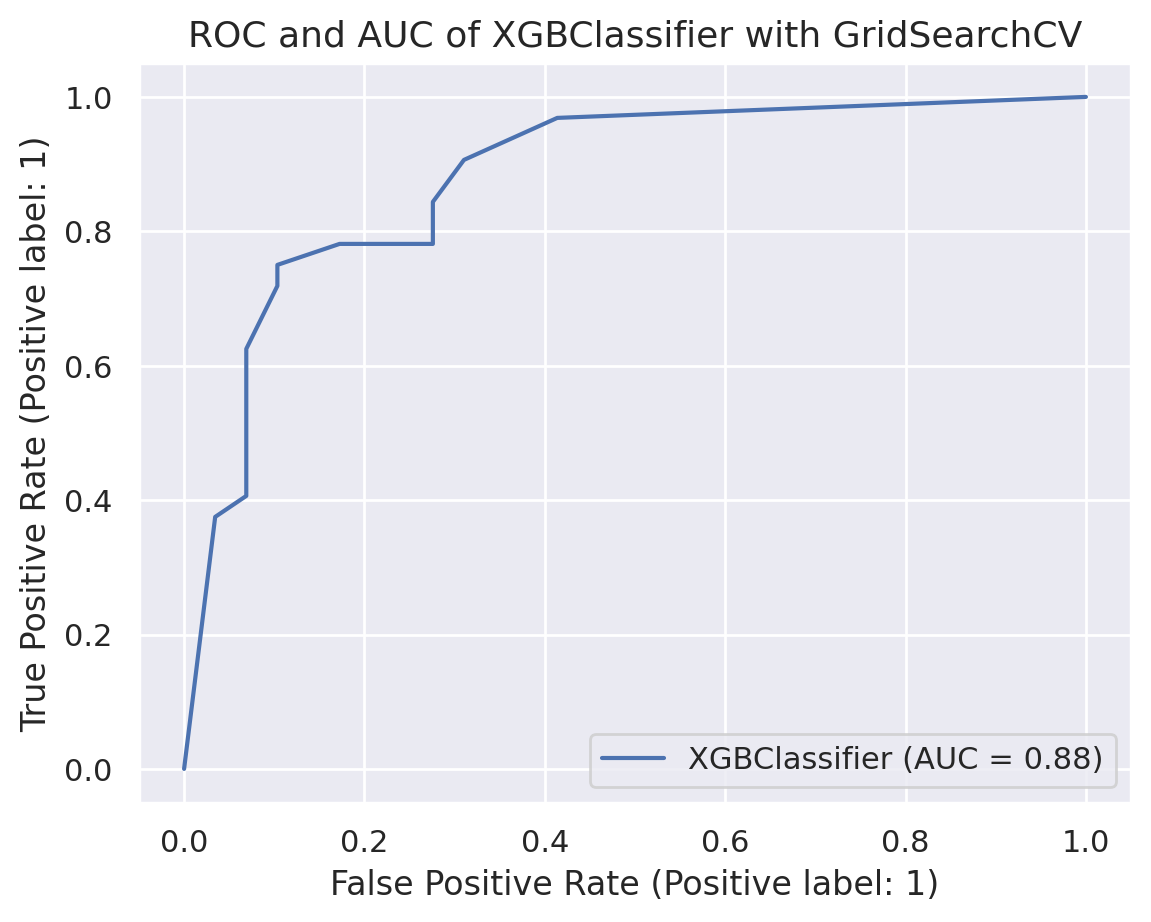

In [ ]:
title1 = 'ROC and AUC of XGBClassifier'
title2 = 'ROC and AUC of XGBClassifier with GridSearchCV'
plot_roc_auc(xgb_model, xgb_gscv, X_test, y_test, title1, title2);

### **6-3. Learning Curve**

In [ ]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4,
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)

    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y,
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    # Plot the learning curves
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt

**# Learning curve for Logistic Regression Models**

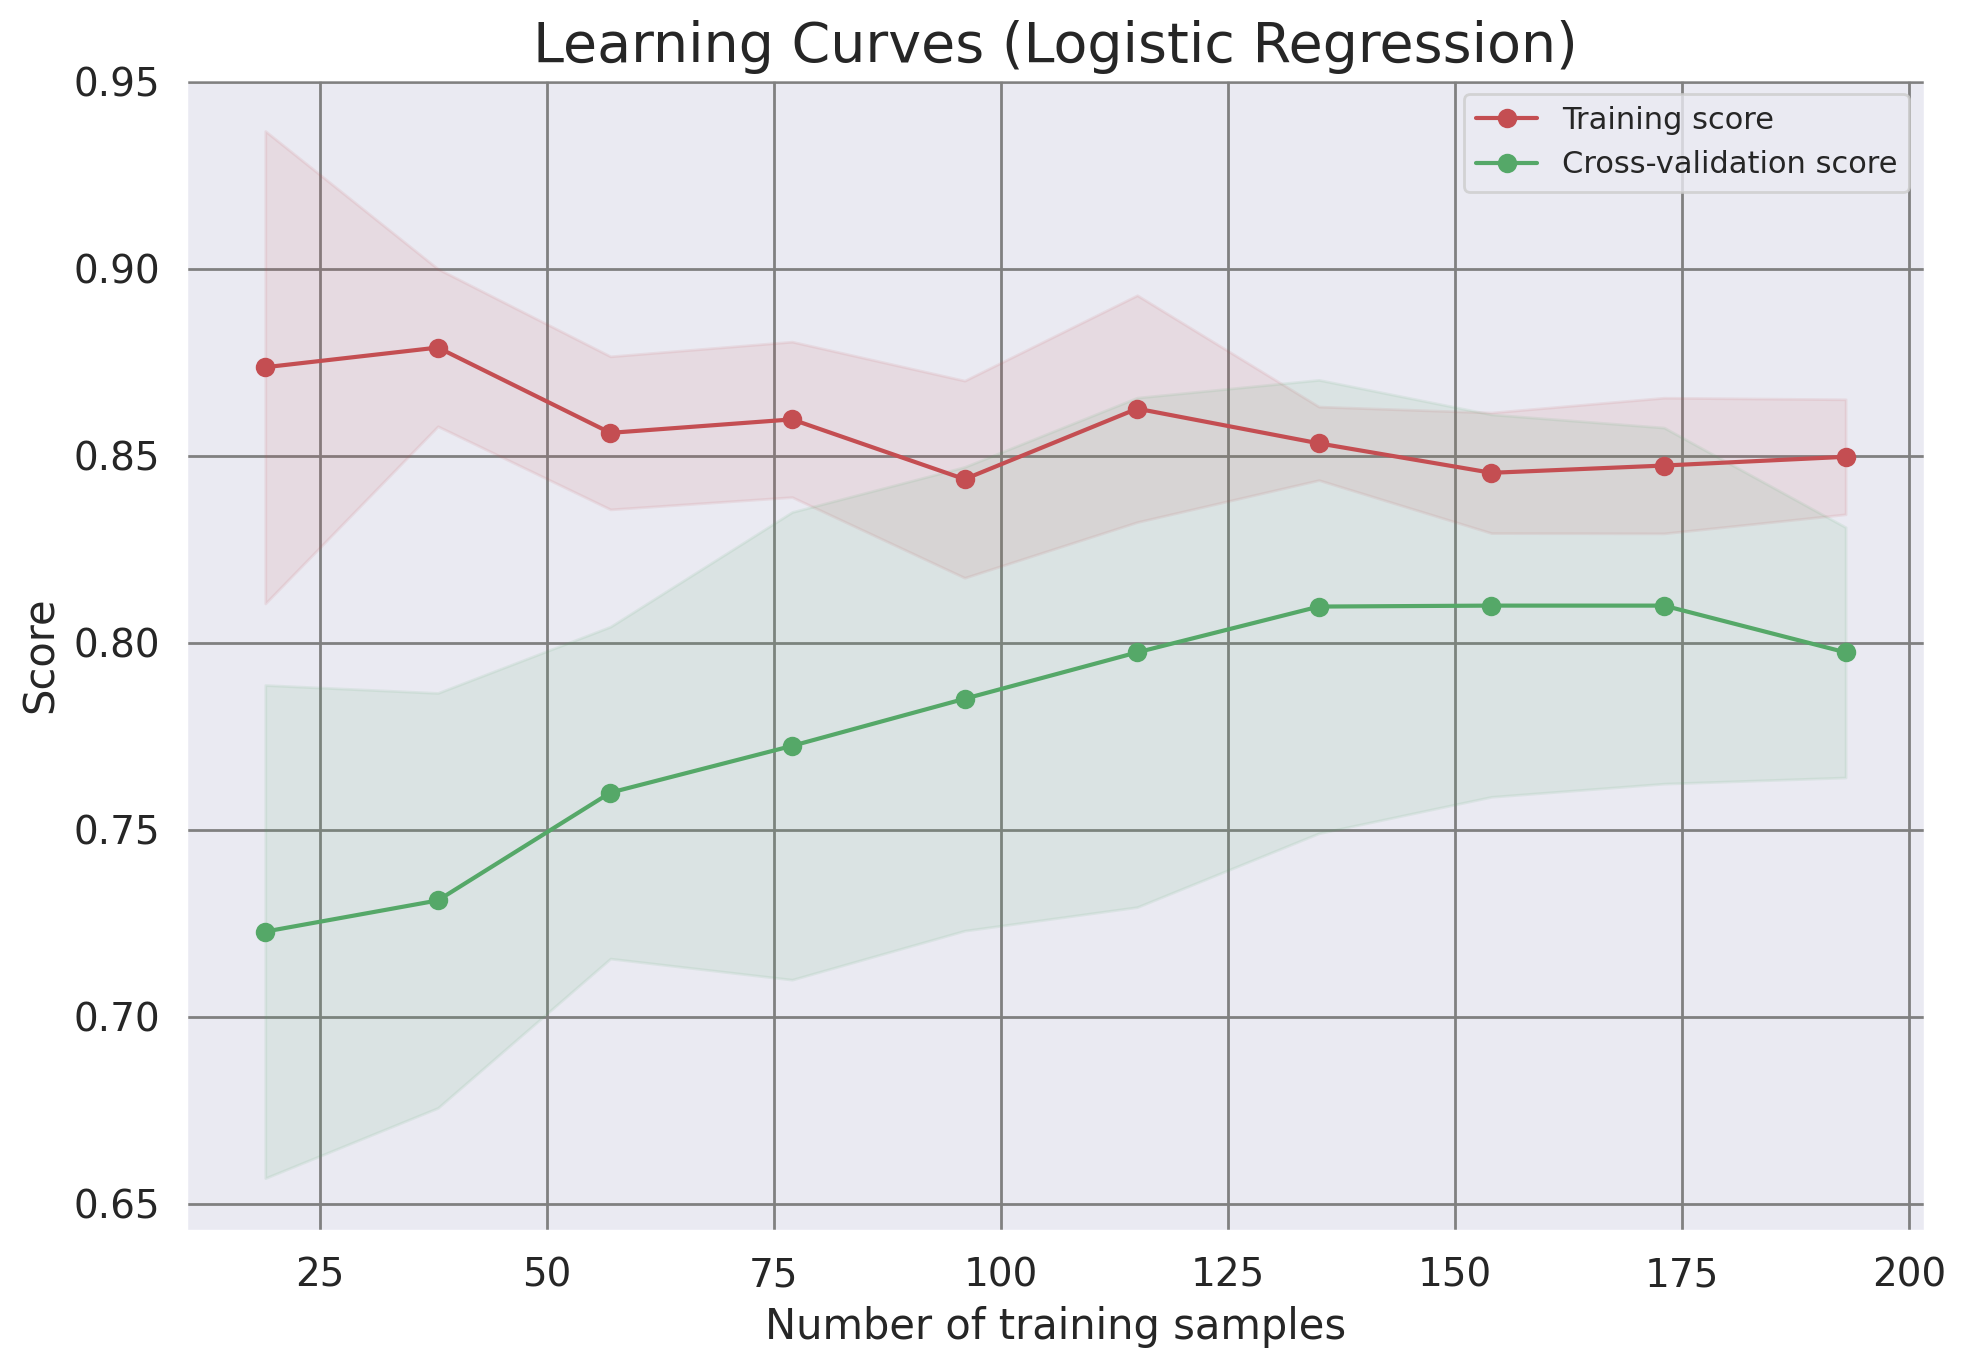

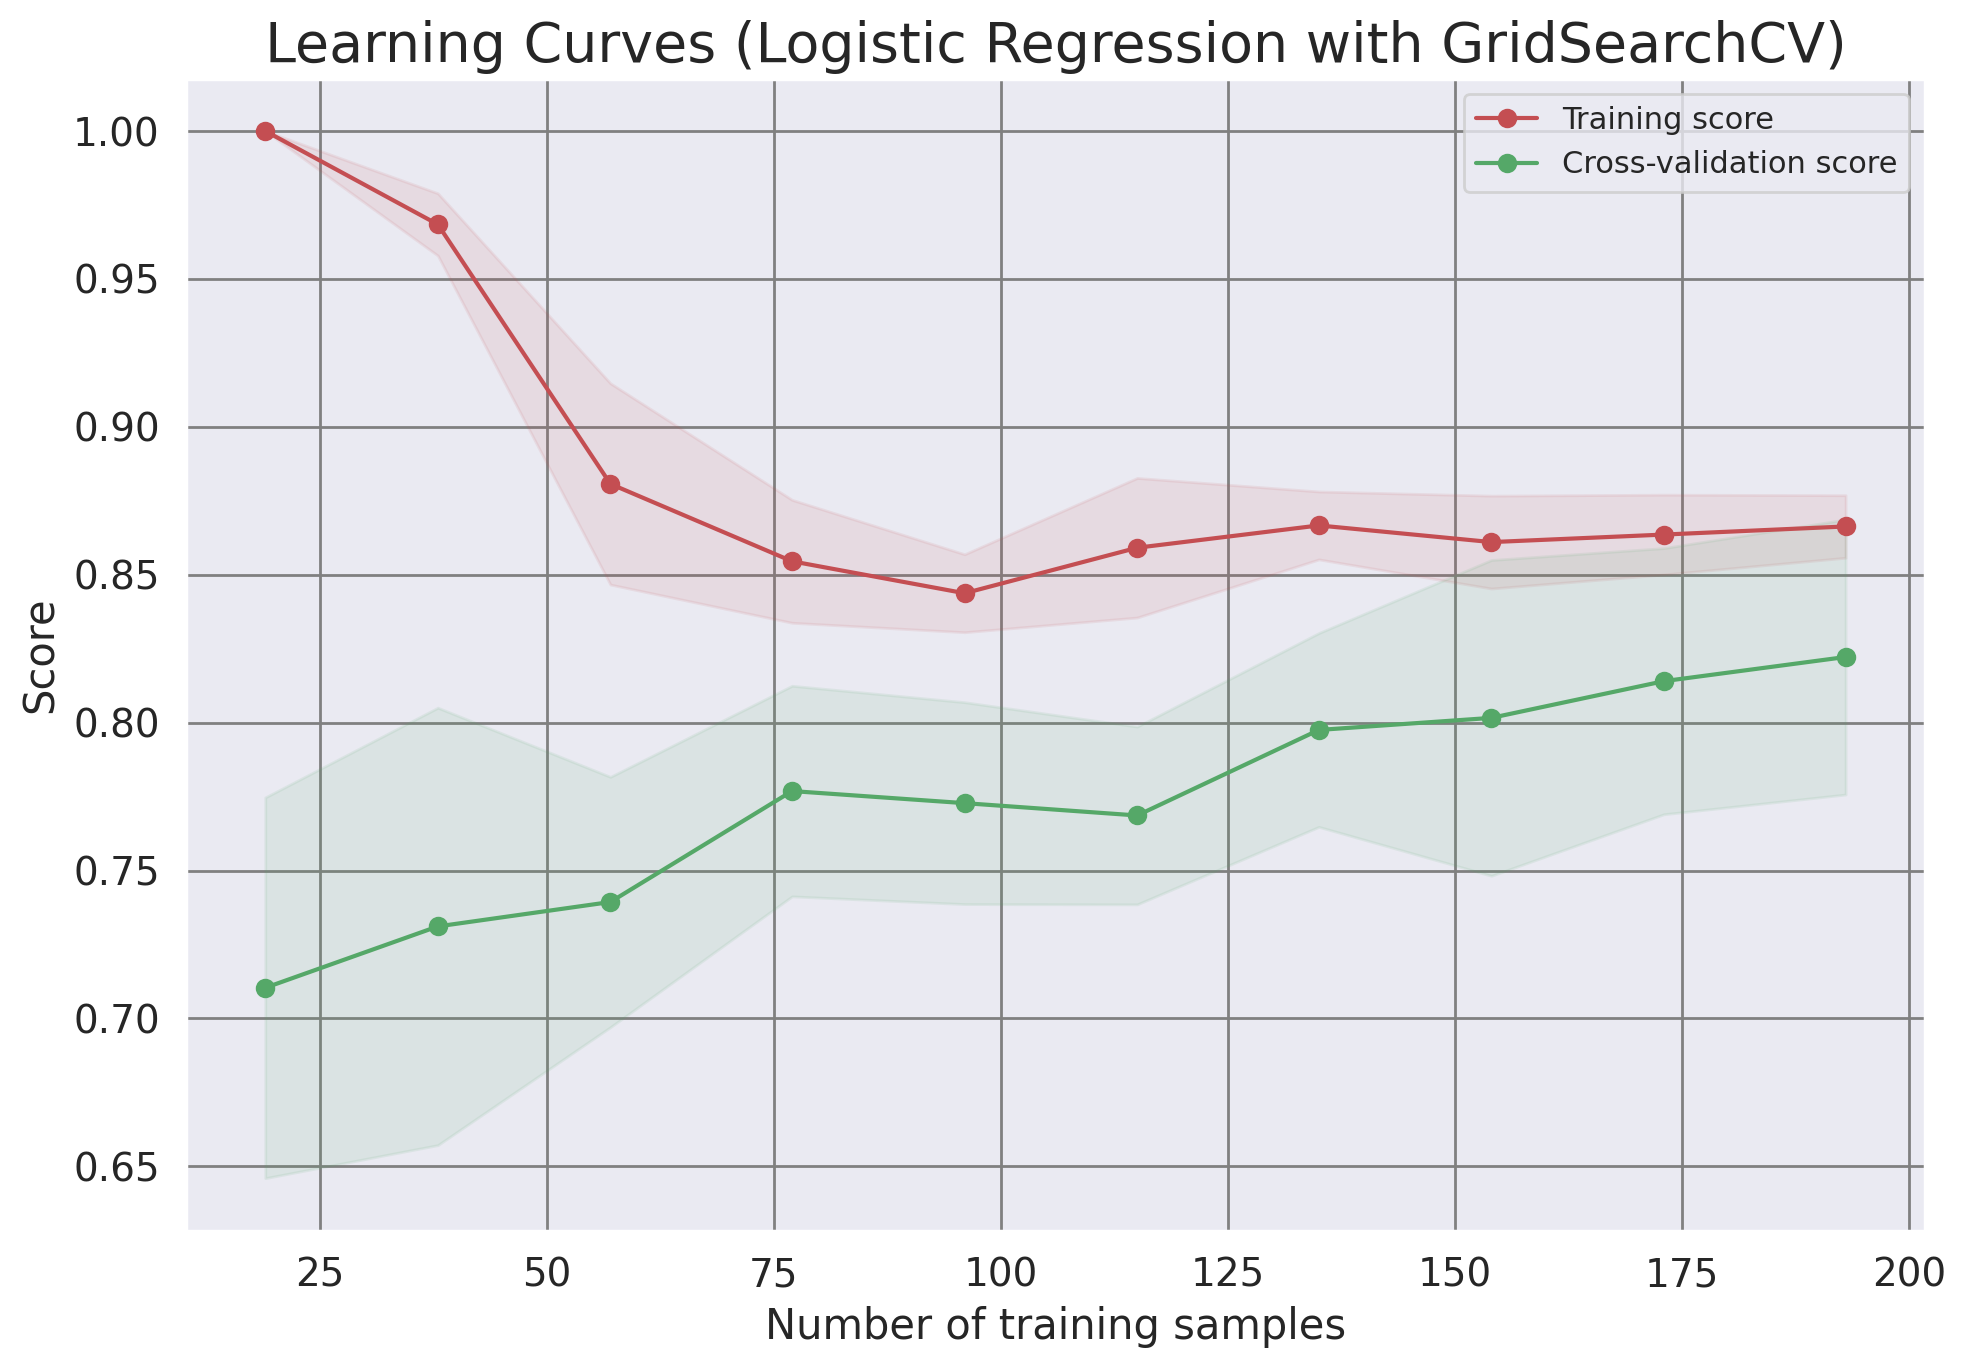

In [ ]:
title = 'Learning Curves (Logistic Regression)'
plot_learning_curve(logreg, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (Logistic Regression with GridSearchCV)'
plot_learning_curve(logreg_gscv, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

**# Learning curve for Random Forest models**

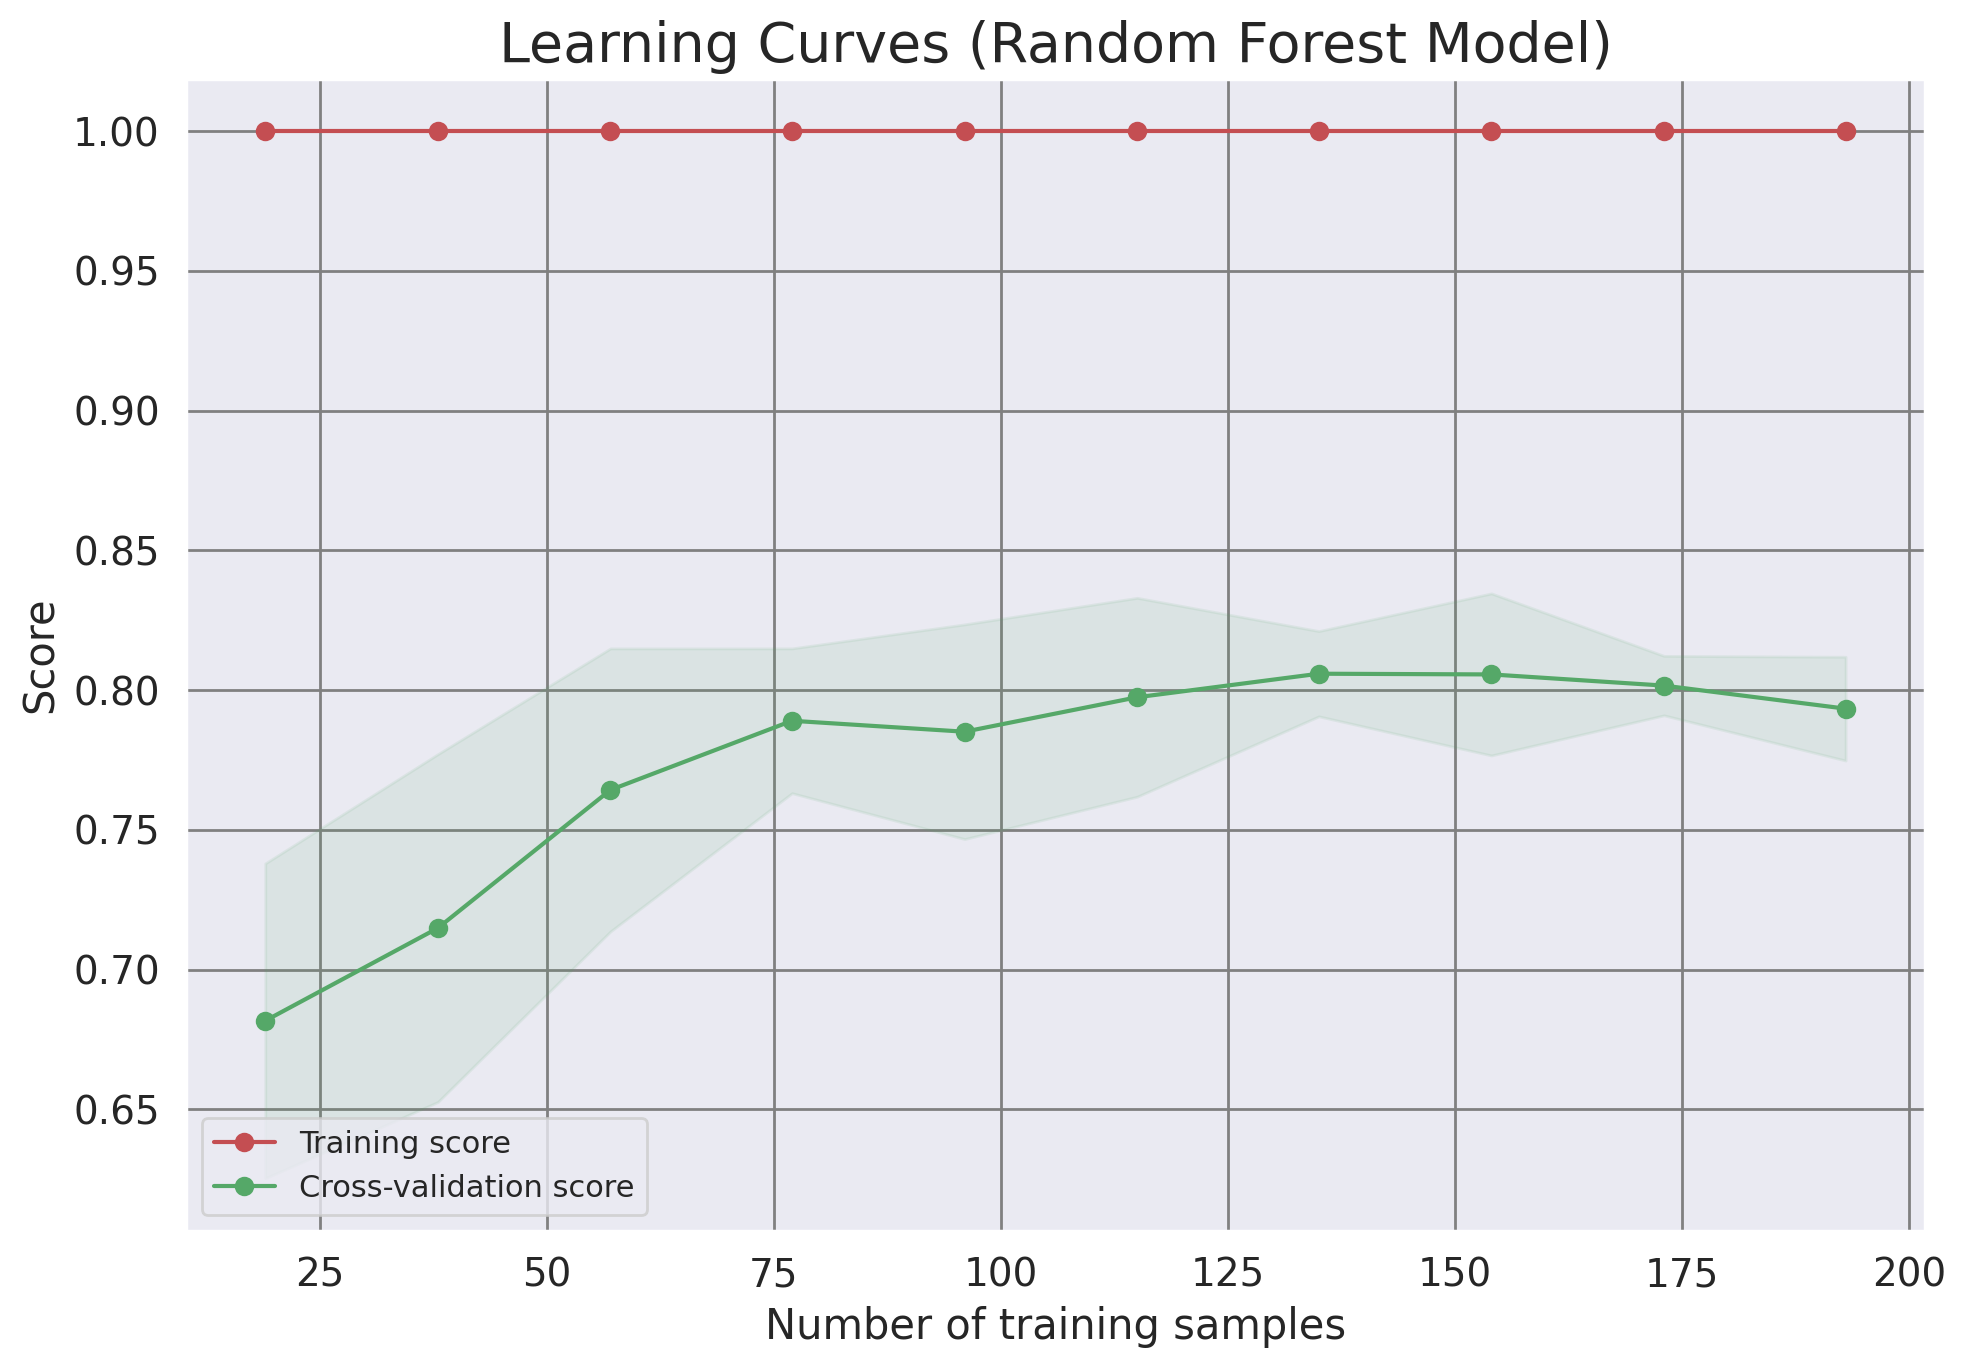

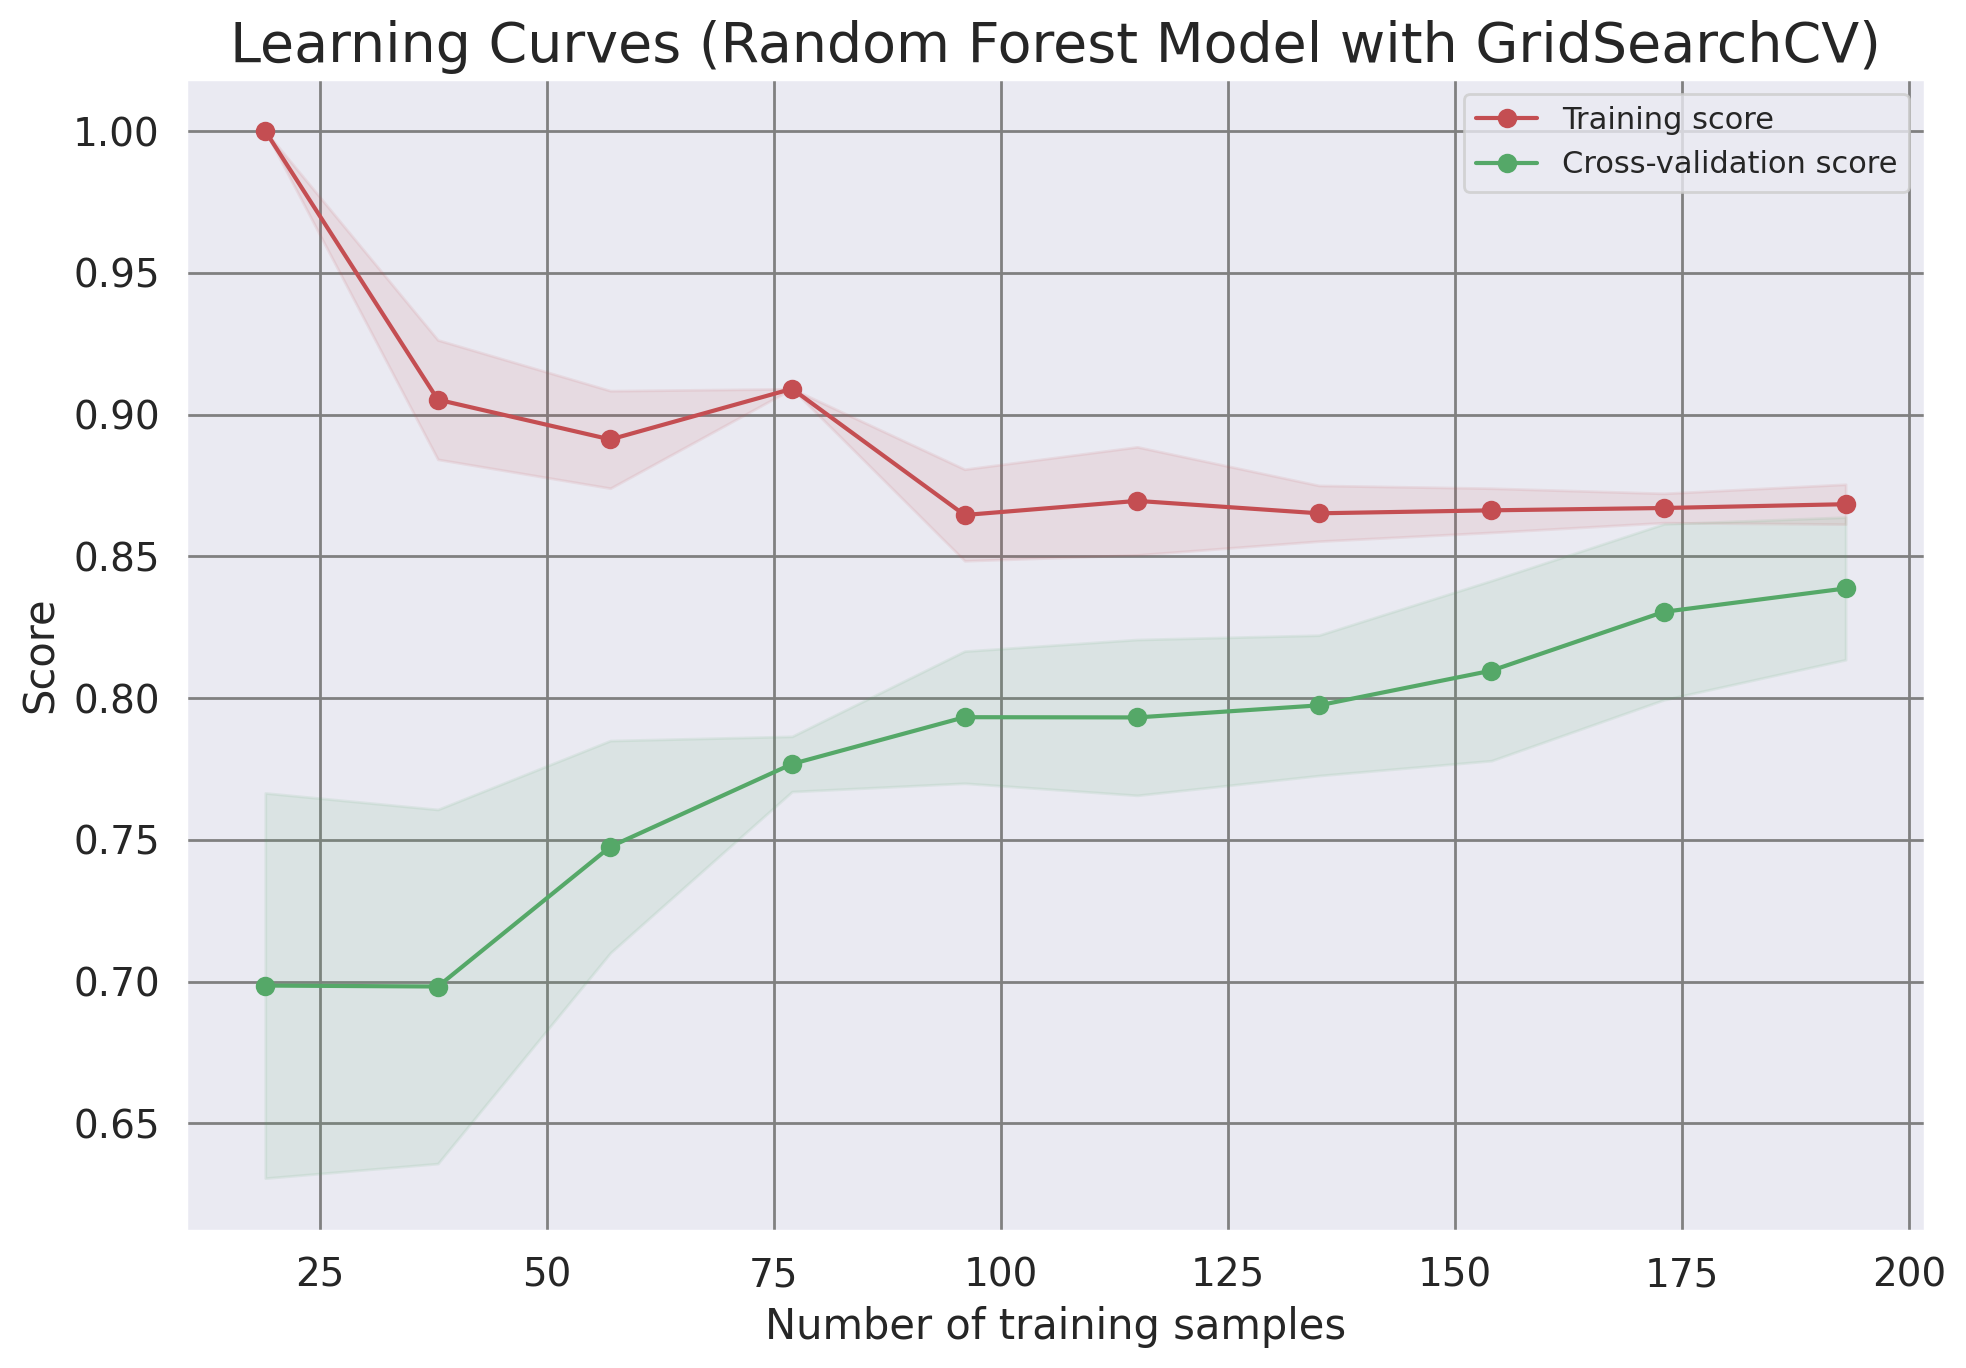

In [ ]:
title = 'Learning Curves (Random Forest Model)'
plot_learning_curve(rf_model, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (Random Forest Model with GridSearchCV)'
plot_learning_curve(rf_gscv, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

**# Learning curve for SVM models**

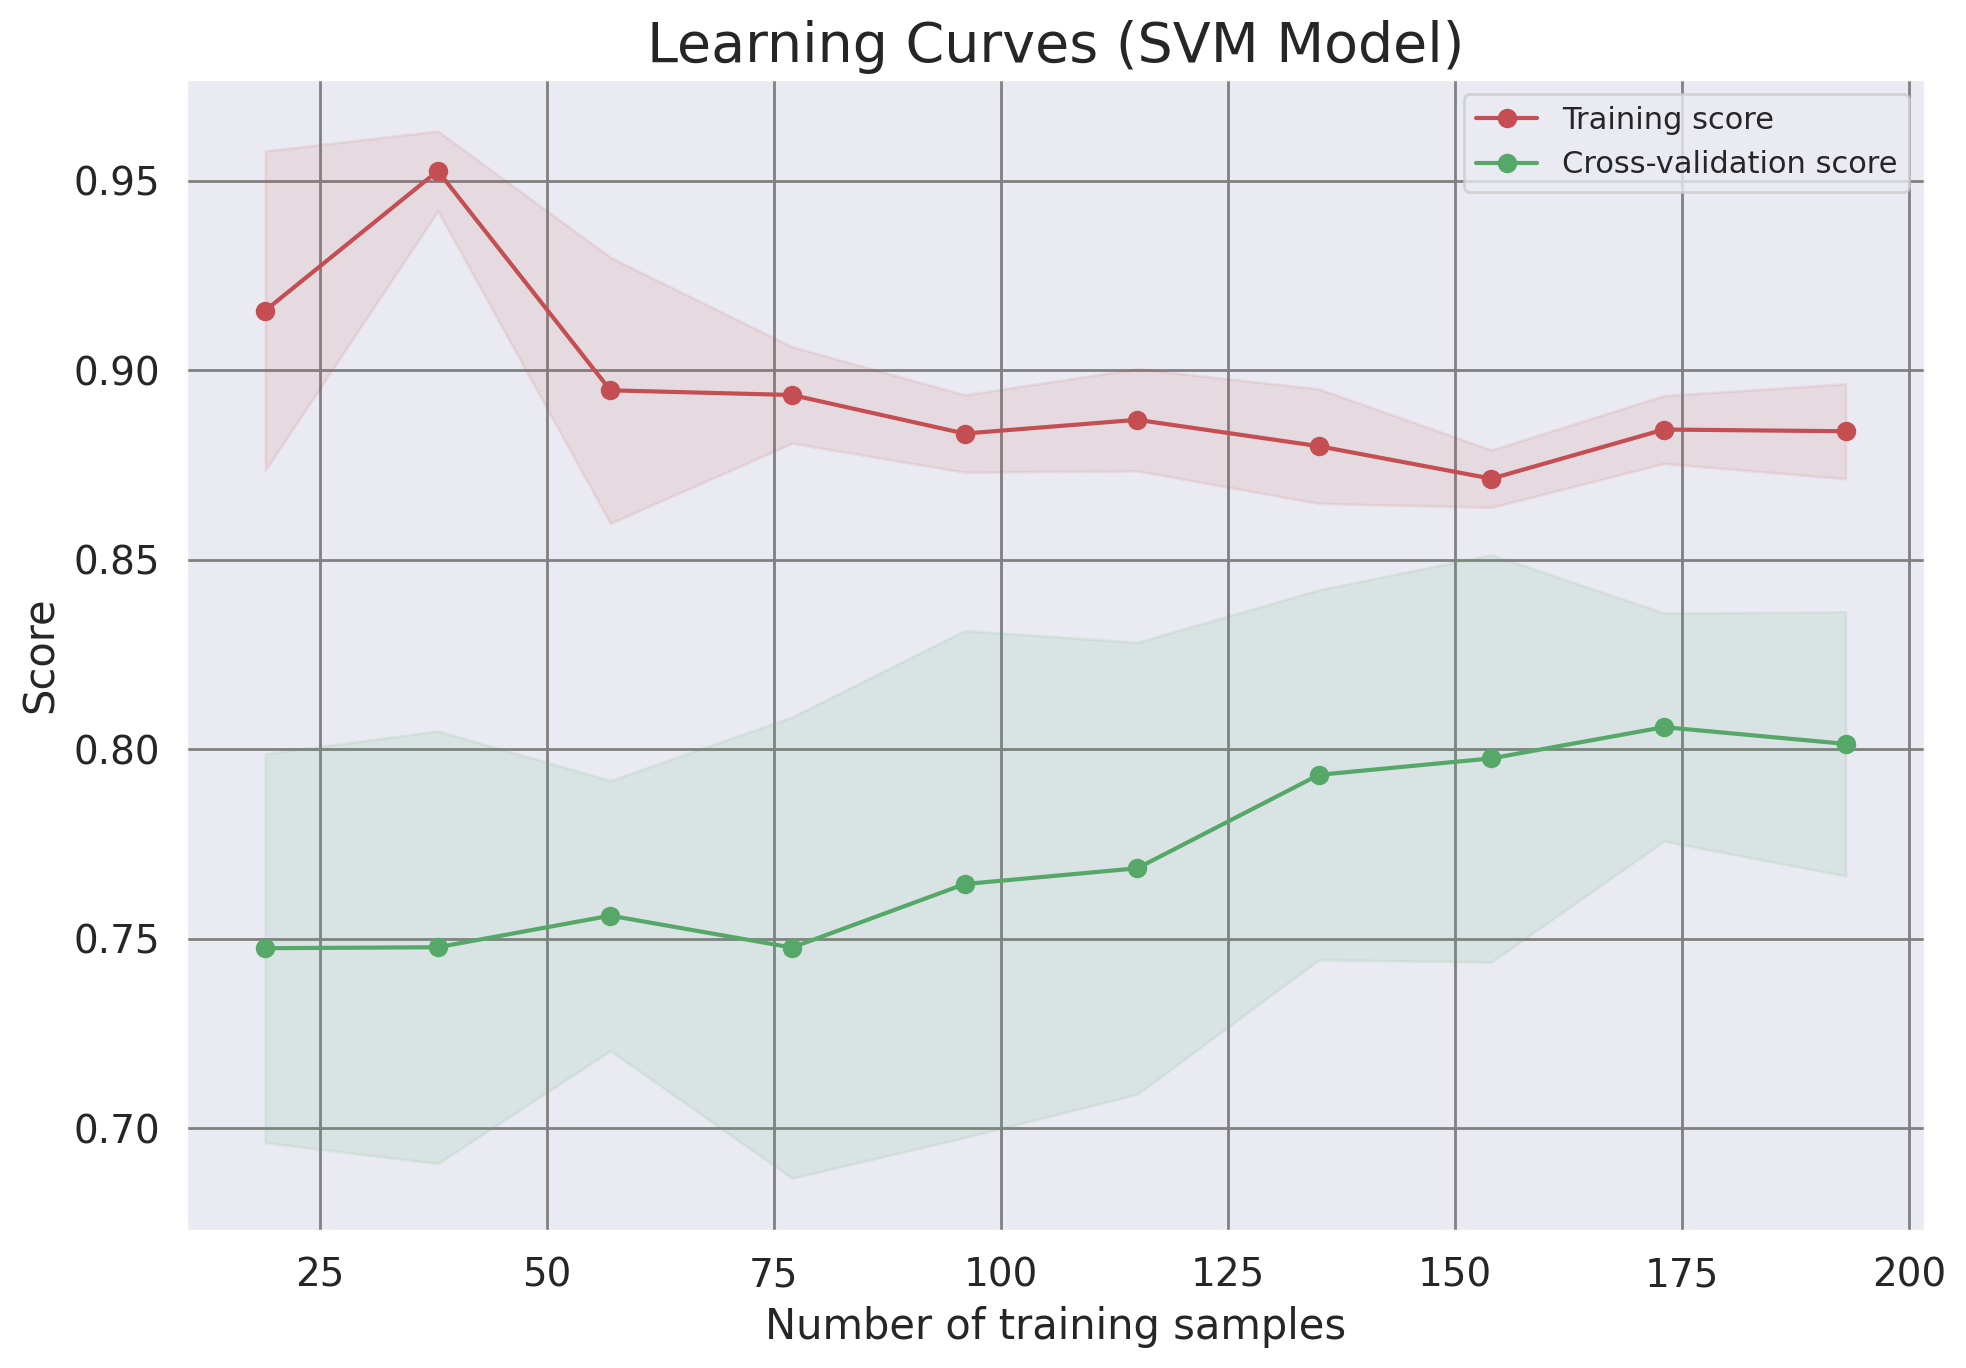

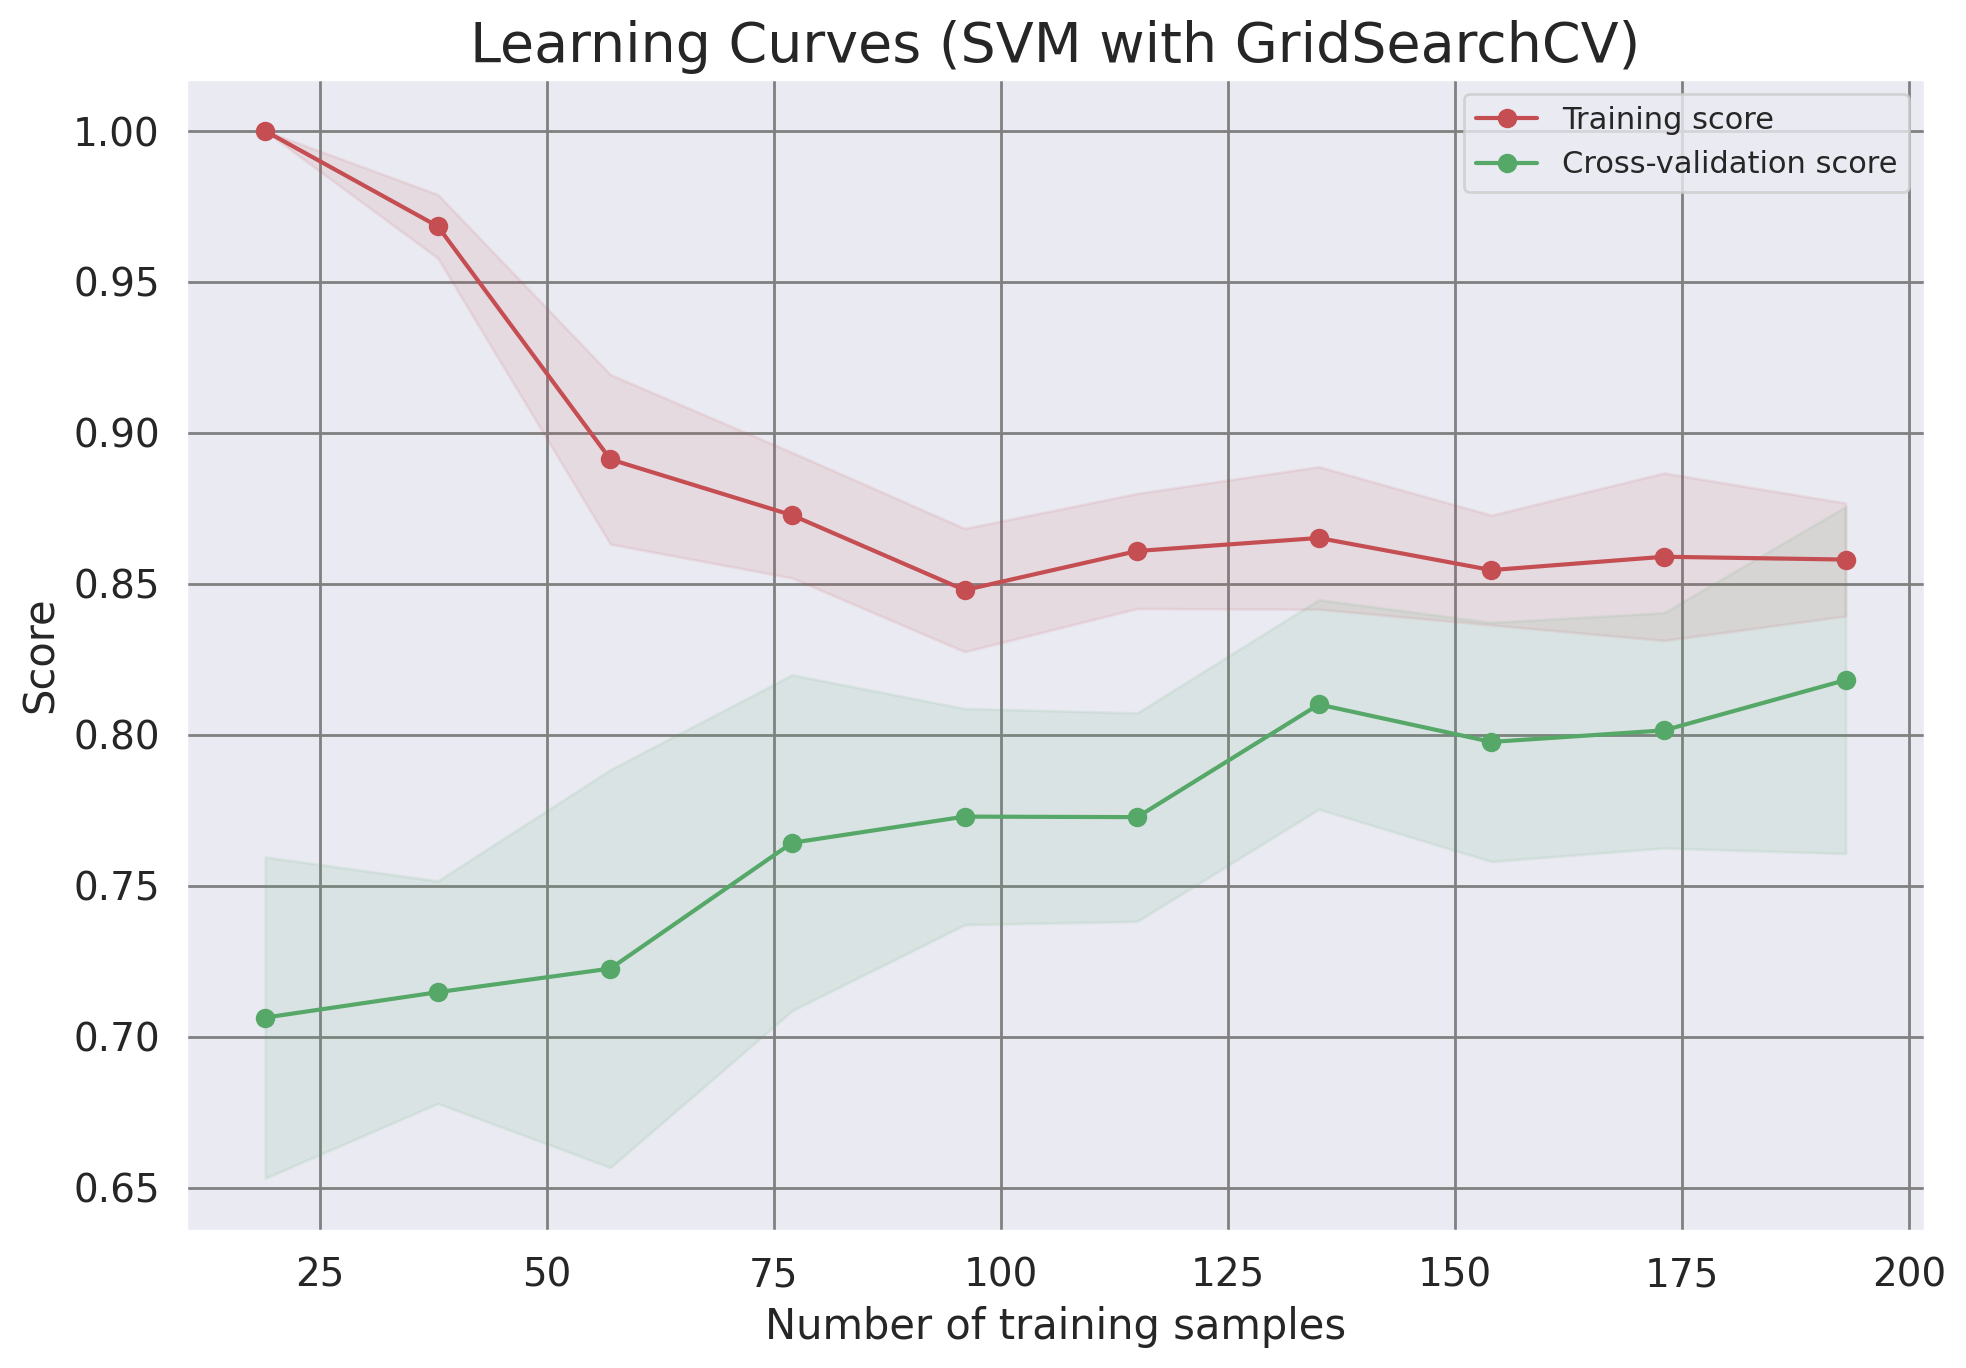

In [ ]:
title = 'Learning Curves (SVM Model)'
plot_learning_curve(svm_model, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (SVM with GridSearchCV)'
plot_learning_curve(svm_gscv, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

**# Learning Curve for XGBoost Classifier Model**

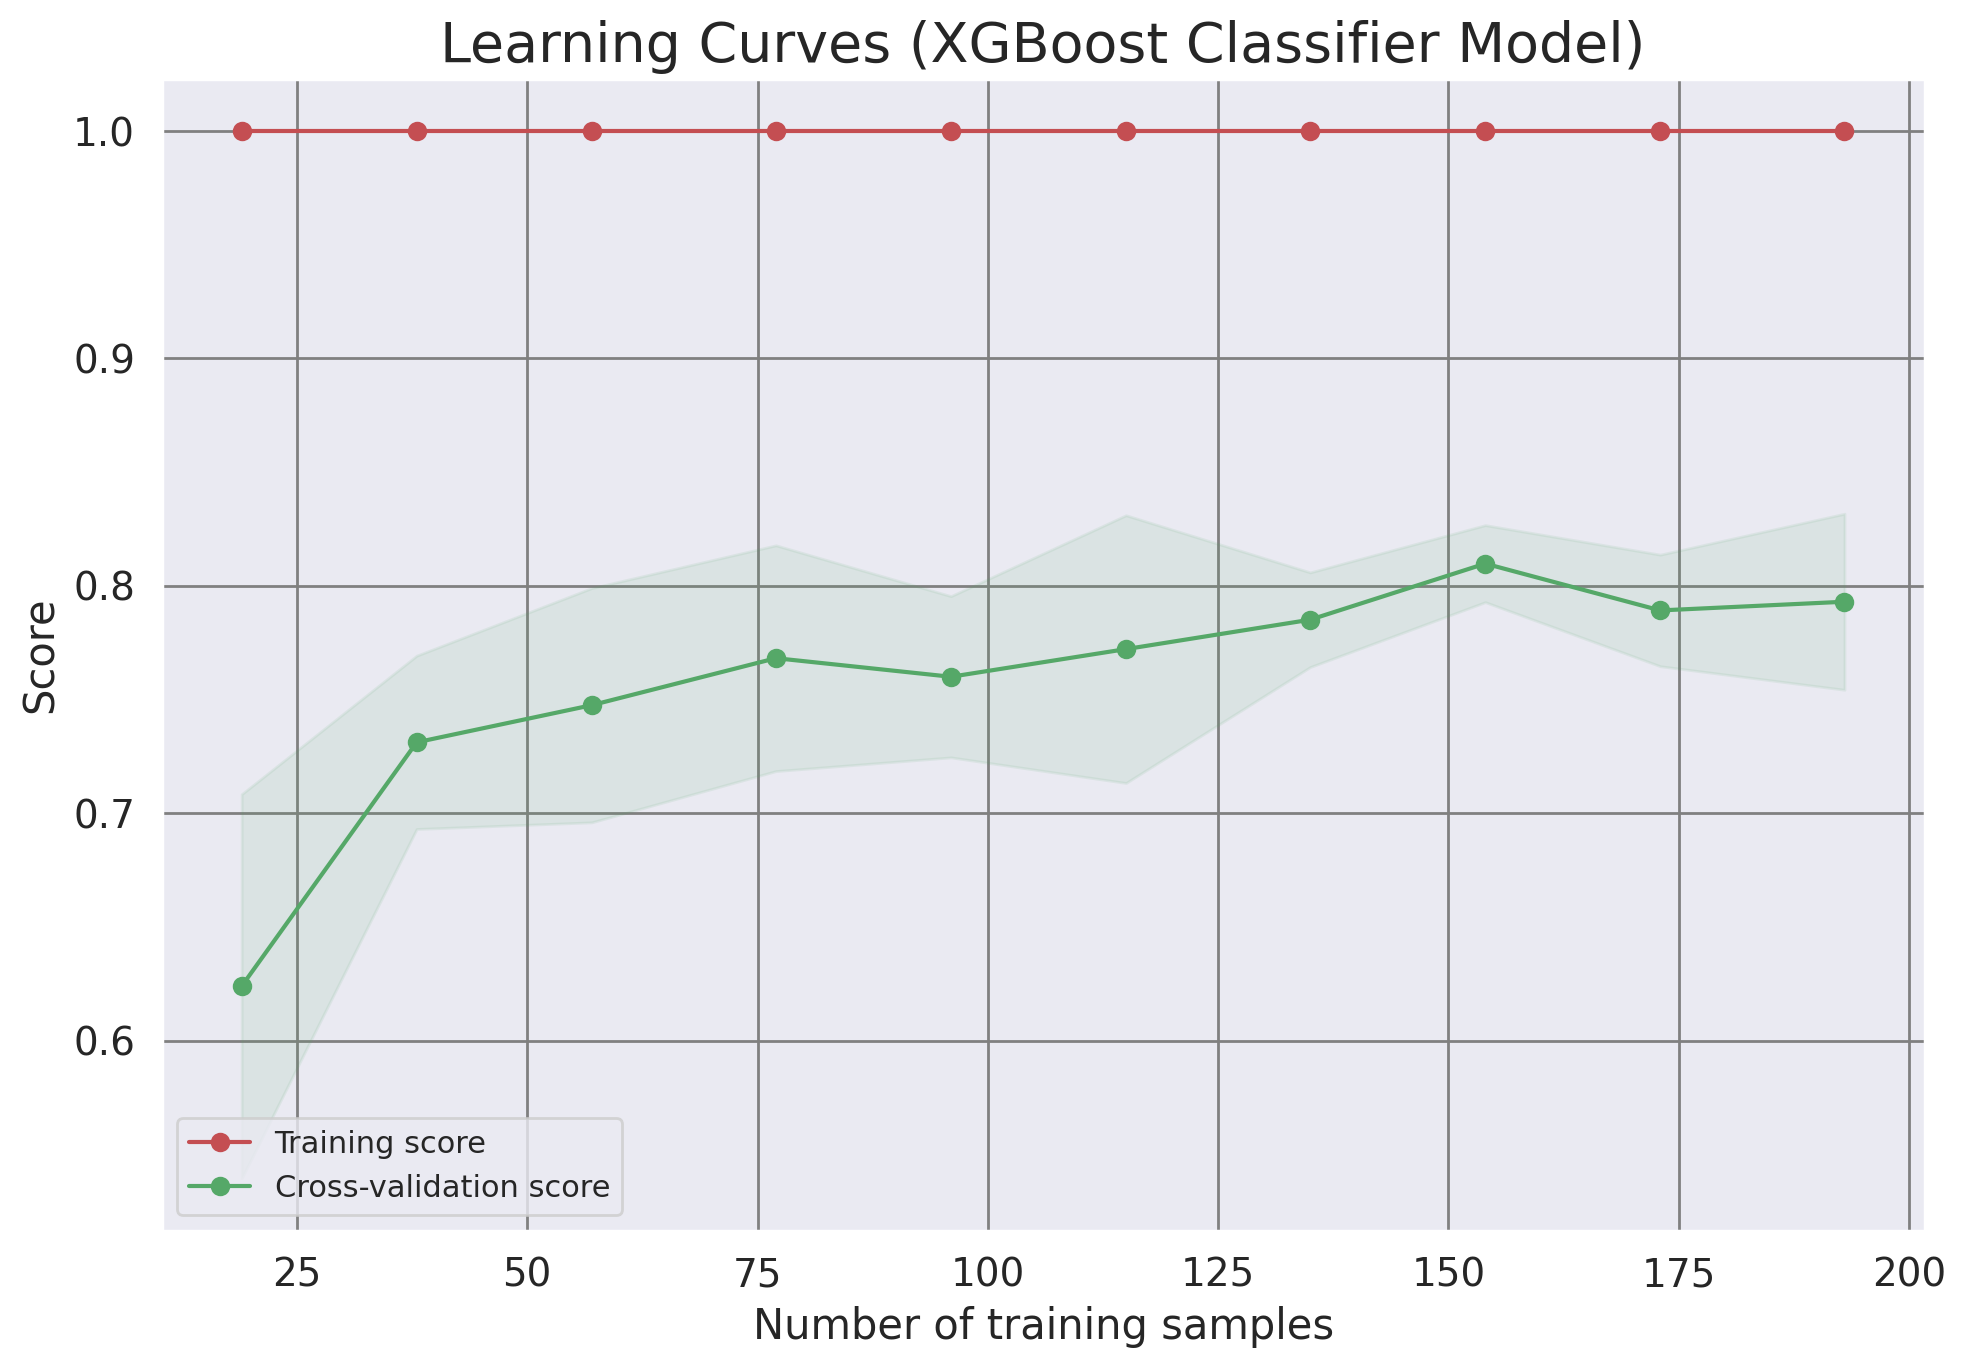

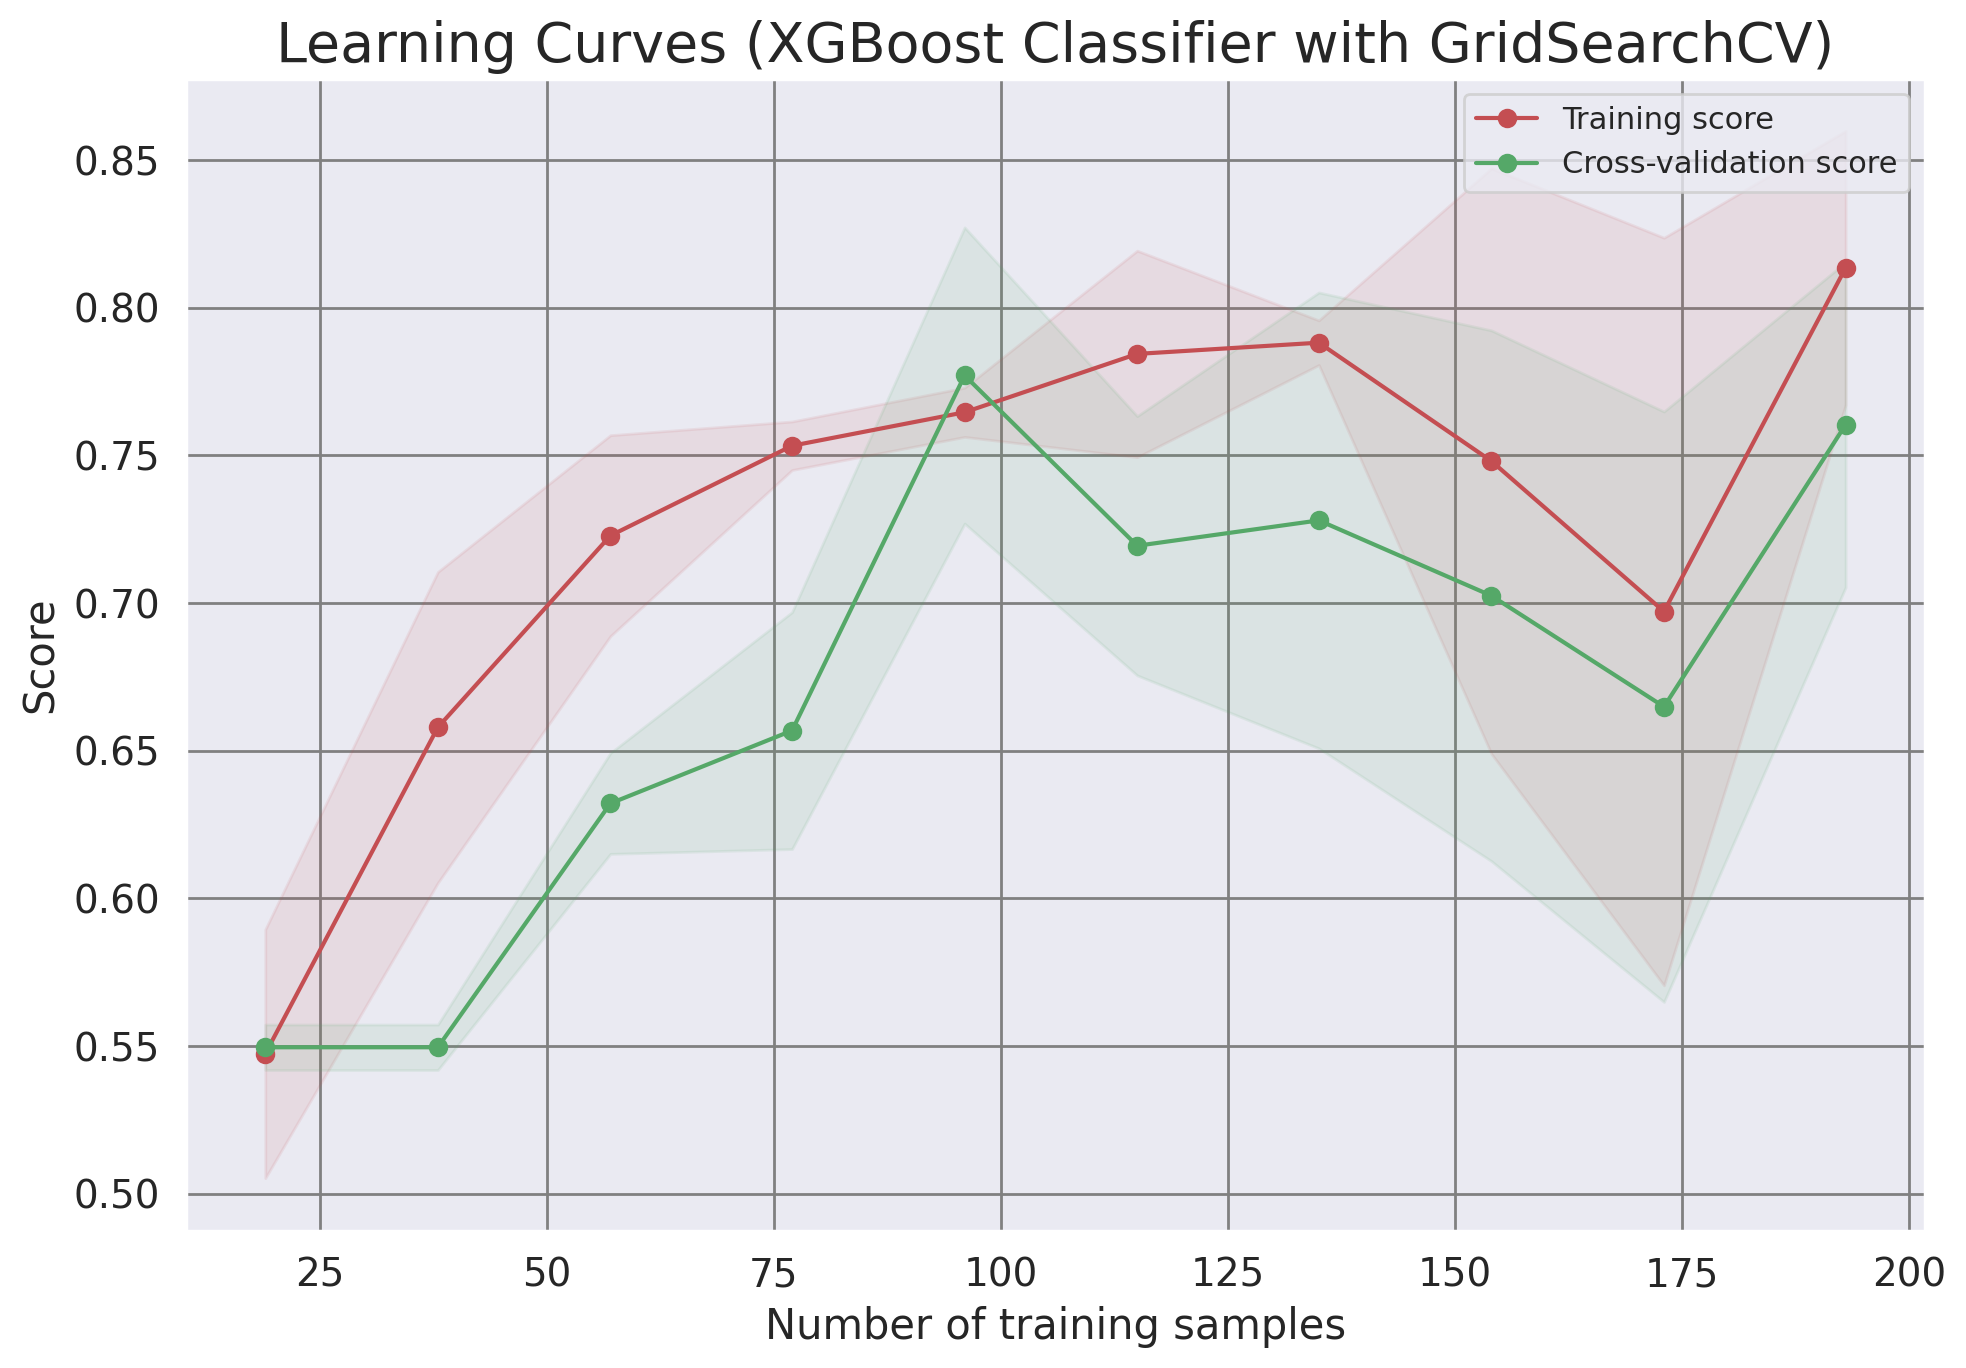

In [ ]:
title = 'Learning Curves (XGBoost Classifier Model)'
plot_learning_curve(xgb_model, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (XGBoost Classifier with GridSearchCV)'
plot_learning_curve(xgb_gscv, title, X_train, y_train, ylim=None,
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

## **7. Model Comparison**

In [ ]:
# Get test and model tuning test score for each model
# Make lits of test score for each model and a model name list
test_list = [logreg_acc, rf_acc, svm_acc, xgb_acc]
tuning_test_list = [logreg_gscv_acc, rf_gscv_acc, svm_gscv_acc, xgb_gscv_acc]
model_names = ['LogisticRegression', 'RandomForest', 'SVM', 'XGBClassifier']

# Make dataframes of each test score
test_list = pd.DataFrame(test_list)
tuning_test_list = pd.DataFrame(tuning_test_list)
model_names = pd.DataFrame(model_names)

# Name each column
test_list.columns = ['Default']
tuning_test_list.columns = ['with GridSearchCV']
model_names.columns = ['model']
# Concatenate each column
over_all_score = pd.concat([model_names, test_list, tuning_test_list], axis=1)
print(over_all_score)


# Plot bar chart of each test score results
fig = go.Figure(data=[go.Bar(x=over_all_score['model'], y=over_all_score['Default'],
                             name='Test Results', texttemplate='%{y:20,.4f}',
                             textposition='outside', marker={'line': {'width': 5}}),
                      go.Bar(x=over_all_score['model'], y=over_all_score['with GridSearchCV'],
                             name='Model Tuning Test Results', texttemplate='%{y:20,.4f}',
                             textposition='outside', marker={'line': {'width': 5}})])
fig.update_layout(title_text='Test and Model Tuning Test Results for each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_xaxes(title_text='Models', title_font={'size': 15})
fig.update_yaxes(title_text='Score', title_font={'size': 15})
fig.update_traces(marker={'line': {'color': 'Black', 'width': 1}})
fig.show()

                model   Default  with GridSearchCV
0  LogisticRegression  0.852459           0.868852
1        RandomForest  0.868852           0.868852
2                 SVM  0.852459           0.885246
3       XGBClassifier  0.836066           0.803279


**SVM with GridSearchCV model showed the best performance.**